# Part I - Loan Data Exploration

## by Luiz Iurk





## Introduction

> This document explores a dataset of more than 100k records with the profile of customers who take loans.<br>
> The intention is to, among all the existing features, select those that stand out the most and identify how they affect the estimated return.

## Preliminary Wrangling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
import pycountry as pc

%matplotlib inline

### Defining Functions and Variables

In [2]:
default_color = sb.color_palette()[0]

In [3]:
def plot_hist(df:pd.DataFrame,target_value:str, labels:list=[],title:str=None, bin_lim:float=0.1, bins = np.arange(0,0), kde=True):
    """ plots a histogram of a target value in a dataframe with a default size of 10% + the max value and 10% - the min value  """
    if bins.size == 0:
        
        bins = np.arange( df[target_value].min()*1-bin_lim, 
                     df[target_value].max()*1+bin_lim, 
                     df[target_value].mean()*bin_lim)
    else:
        bins = bins
    plt.figure(figsize=(8, 4))
    sb.histplot(data=df, x=target_value, bins=bins, kde = kde)
    
    if not labels:
        plt.xlabel(target_value)
        plt.ylabel("Counts")
    else:
        plt.xlabel(labels[0])
        plt.ylabel(labels[1])
    
    if not title:
        plt.title(f"Histogram of {target_value}")
    else:
        plt.title(title)
    
    return plt.show();

In [4]:
# Since this data has more than 80 columns, I will deactivate pandas limit to investigate the data closely
pd.set_option("display.max_columns", None)

In [5]:
df_loans_raw = pd.read_csv("prosperLoanData.csv")
df_loans_raw.sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
11317,54CE35780145781835AC284,768021,2013-05-04 13:25:22.997000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,10.0,1,NY,Other,Full-time,152.0,False,False,NaN,2013-05-04 13:25:17,700.0,719.0,1994-04-21 00:00:00,9.0,9.0,17.0,10,396.0,1.0,3.0,1.0,14.0,0.0,0.0,0.0,15252.0,0.23,50376.0,15.0,0.93,0.0,0.25,"$1-24,999",True,2062.583333,05D73681467504239A25BC5,1.0,12.0,12.0,0.0,0.0,1500.0,0.00,-29.0,0,NaN,10,89896,4000,2013-05-07 00:00:00,Q2 2013,BDCA33654855698045F8F48,128.58,1558.64,1320.16,238.48,-24.48,0.0,0.00,0.00,0.0,1.0,1,0,0.0,85
2288,2AA136039431268891F2466,1166956,2014-02-19 14:11:22.497000000,NaN,36,Current,NaN,0.12727,0.0990,0.0890,0.08619,0.0274,0.05879,6.0,A,11.0,1,CO,Professional,Employed,23.0,True,False,NaN,2014-02-19 14:11:24,720.0,739.0,1986-03-21 00:00:00,19.0,18.0,37.0,16,1297.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,61476.0,0.45,74681.0,36.0,0.97,1.0,0.25,"$100,000+",True,11250.000000,143137077115191904C539F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,133417,35000,2014-02-21 00:00:00,Q1 2014,83FA37066283681972A1981,1127.71,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
61535,FF5D3506293711597CA8389,492377,2011-01-30 14:01:24.680000000,NaN,36,Chargedoff,2013-02-07 00:00:00,0.28488,0.2499,0.2399,0.23400,0.0980,0.13600,3.0,D,7.0,2,FL,Other,Full-time,123.0,False,False,NaN,2011-01-30 14:01:16,660.0,679.0,1985-03-28 00:00:00,5.0,5.0,25.0,4,131.0,2.0,4.0,1.0,0.0,7.0,1.0,0.0,3597.0,0.37,5266.0,18.0,0.68,3.0,0.01,"$100,000+",True,45833.333333,16DC3611608872050D64323,1.0,11.0,11.0,0.0,0.0,3500.0,2638.65,-10.0,518,24.0,37,46889,5700,2011-02-08 00:00:00,Q1 2011,B9D43476517621544B10EF2,226.60,4305.40,2487.78,1817.62,-72.74,0.0,3212.22,3212.22,0.0,1.0,0,0,0.0,114
67472,D00A3403869867084791A13,222053,2007-10-27 06:46:33.777000000,AA,36,Completed,2008-06-06 00:00:00,0.08433,0.0775,0.0775,NaN,NaN,NaN,NaN,NaN,NaN,0,CA,Other,Full-time,34.0,True,True,2A293403698996564CAE70C,2007-10-27 06:42:56.023000000,780.0,799.0,1998-08-01 00:00:00,14.0,9.0,19.0,8,343.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,20593.0,0.33,41431.0,17.0,0.94,1.0,0.06,"$75,000-99,999",True,7083.333333,34743406004755173297823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,76,21917,2500,2007-11-26 00:00:00,Q4 2007,96A03402277821818575A8C,78.05,2595.55,2500.00,95.55,0.00,0.0,0.00,0.00,0.0,1.0,0,0,0.0,137
89302,F64633800719827316FD99A,91152,2007-01-31 00:55:46.627000000,AA,36,Completed,2010-02-20 00:00

> Among all the columns, I will start with a subset of columns which I find that can bring useful information about the customer profile.<br>
> The `ListingKey` field will also be selected, since it can be linked to the full table to fetch any missing field for the analysis.

In [6]:
study_subset = [
    "ListingKey",
    "ListingCreationDate",
    "Term",
    "LoanStatus",
    "ClosedDate",
    "BorrowerAPR",
    "EstimatedReturn",
    "BorrowerRate",
    "ProsperRating (Alpha)",
    "ProsperScore",
    "ListingCategory (numeric)",
    "BorrowerState",
    "Occupation",
    "EmploymentStatus",
    "EmploymentStatusDuration",
    "IsBorrowerHomeowner",
    "DateCreditPulled",
    "CreditScoreRangeLower",
    "CreditScoreRangeUpper",
    "CurrentCreditLines",
    "OpenCreditLines",
    "TotalCreditLinespast7years",
    "InquiriesLast6Months",
    "CurrentDelinquencies",
    "DelinquenciesLast7Years",
    "BankcardUtilization",
    "IncomeRange",
    "StatedMonthlyIncome",
    "TotalProsperLoans",
    "LoanOriginalAmount",
    "Recommendations",
]

### Assessing Data

In [7]:
df_loans_raw[study_subset].shape

(113937, 31)

In [8]:
# There are duplicates and must be discarded
df_loans_raw.duplicated(subset=["ListingKey", "ListingCreationDate"]).sum()

871

### Identified Quality and Tidiness issues

1. Duplicated Keys
2. Column name ´ListingCategory (numeric)´ should be renamed removing parenthesis
3. Change datatypes of some columns
5. Null `BorrowerAPR` records
7. Missing `Occupation`, `EmploymentStatusDuration`
10. Fill `TotalProsperLoans` with 0
11. Get the quarter when the credit was pulled from `DateCreditPulled`

### Cleaning the Data

In [9]:
df_loans_clnd = df_loans_raw.copy()

> According to the documentation, the `EstimatedReturn` is only available as of July 2009. Thus the dataset will be filtered to fetch only records from this date onwards.

In [10]:
df_loans_clnd = df_loans_clnd[df_loans_clnd["ListingCreationDate"]>"2009-07-01"]

In [11]:
df_loans_clnd = df_loans_clnd.drop_duplicates(
    subset=["ListingKey", "ListingCreationDate"]
)
df_loans_clnd.reset_index(drop=True, inplace=True)
df_loans_clnd.shape

(83982, 81)

In [12]:
df_load_study = df_loans_clnd.copy()[study_subset]
df_load_study.shape

(83982, 31)

In [13]:
df_load_study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83982 entries, 0 to 83981
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ListingKey                  83982 non-null  object 
 1   ListingCreationDate         83982 non-null  object 
 2   Term                        83982 non-null  int64  
 3   LoanStatus                  83982 non-null  object 
 4   ClosedDate                  25992 non-null  object 
 5   BorrowerAPR                 83982 non-null  float64
 6   EstimatedReturn             83982 non-null  float64
 7   BorrowerRate                83982 non-null  float64
 8   ProsperRating (Alpha)       83982 non-null  object 
 9   ProsperScore                83982 non-null  float64
 10  ListingCategory (numeric)   83982 non-null  int64  
 11  BorrowerState               83982 non-null  object 
 12  Occupation                  82708 non-null  object 
 13  EmploymentStatus            839

In [14]:
#Creating a saving point
df_load_study_cln = df_load_study.copy()

#### Renaming Columns Removing special characters

In [15]:
df_load_study_cln.rename(
    columns={
        "ProsperRating (numeric)": "ProsperRatingNum",
        "ProsperRating (Alpha)": "ProsperRatingAlpha",
        "ListingCategory (numeric)": "ListingCategory",
    },
    inplace=True,
)

In [16]:
df_load_study_cln.head()

,ListingKey,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,EstimatedReturn,BorrowerRate,ProsperRatingAlpha,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,InquiriesLast6Months,CurrentDelinquencies,DelinquenciesLast7Years,BankcardUtilization,IncomeRange,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,Recommendations
0,10273602499503308B223C1,2014-02-27 08:28:07.900000000,36,Current,NaN,0.12016,0.05470,0.0920,A,7.0,2,CO,Professional,Employed,44.0,False,2014-02-27 08:28:14,680.0,699.0,14.0,14.0,29.0,3.0,0.0,0.0,0.21,"$50,000-74,999",6125.000000,NaN,10000,0
1,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,36,Current,NaN,0.12528,0.06000,0.0974,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,2012-10-22 11:02:32,800.0,819.0,5.0,5.0,29.0,0.0,4.0,14.0,0.04,"$25,000-49,999",2875.000000,NaN,10000,0
2,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,36,Current,NaN,0.24614,0.09066,0.2085,D,4.0,2,MN,Executive,Employed,44.0,True,2013-09-14 18:38:44,680.0,699.0,19.0,19.0,49.0,1.0,0.0,0.0,0.81,"$100,000+",9583.333333,1.0,15000,0
3,0F05359734824199381F61D,2013-12-14 08:26:37.093000000,60,Current,NaN,0.15425,0.07077,0.1314,B,10.0,1,NM,Professional,Employed,82.0,True,2013-12-14 08:26:40,740.0,759.0,21.0,17.0,49.0,0.0,0.0,0.0,0.39,"$100,000+",8333.333333,NaN,15000,0
4,0F0A3576754255009D63151,2013-04-12 09:52:56.147000000,36,Current,NaN,0.31032,0.11070,0.2712,E,2.0,1,KS,Sales - Retail,Employed,172.0,False,2013-04-12 09:52:53,680.0,699.0,10.0,7.0,20.0,0.0,0.0,0.0,0.72,"$25,000-49,999",2083.333333,NaN,3000,0


#### Changing Column Data types

In [17]:
date_cols = ["ListingCreationDate", "ClosedDate", "DateCreditPulled"]
df_load_study_cln[date_cols] = df_load_study_cln[date_cols].apply(pd.to_datetime)

In [18]:
# Since Hour, Minutes and Seconds are not relevant, will discard these values from date columns

for col in date_cols:
    df_load_study_cln[col] = df_load_study_cln[col].dt.normalize()

df_load_study_cln.head()

,ListingKey,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,EstimatedReturn,BorrowerRate,ProsperRatingAlpha,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,InquiriesLast6Months,CurrentDelinquencies,DelinquenciesLast7Years,BankcardUtilization,IncomeRange,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,Recommendations
0,10273602499503308B223C1,2014-02-27,36,Current,NaT,0.12016,0.05470,0.0920,A,7.0,2,CO,Professional,Employed,44.0,False,2014-02-27,680.0,699.0,14.0,14.0,29.0,3.0,0.0,0.0,0.21,"$50,000-74,999",6125.000000,NaN,10000,0
1,0EF5356002482715299901A,2012-10-22,36,Current,NaT,0.12528,0.06000,0.0974,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,2012-10-22,800.0,819.0,5.0,5.0,29.0,0.0,4.0,14.0,0.04,"$25,000-49,999",2875.000000,NaN,10000,0
2,0F023589499656230C5E3E2,2013-09-14,36,Current,NaT,0.24614,0.09066,0.2085,D,4.0,2,MN,Executive,Employed,44.0,True,2013-09-14,680.0,699.0,19.0,19.0,49.0,1.0,0.0,0.0,0.81,"$100,000+",9583.333333,1.0,15000,0
3,0F05359734824199381F61D,2013-12-14,60,Current,NaT,0.15425,0.07077,0.1314,B,10.0,1,NM,Professional,Employed,82.0,True,2013-12-14,740.0,759.0,21.0,17.0,49.0,0.0,0.0,0.0,0.39,"$100,000+",8333.333333,NaN,15000,0
4,0F0A3576754255009D63151,2013-04-12,36,Current,NaT,0.31032,0.11070,0.2712,E,2.0,1,KS,Sales - Retail,Employed,172.0,False,2013-04-12,680.0,699.0,10.0,7.0,20.0,0.0,0.0,0.0,0.72,"$25,000-49,999",2083.333333,NaN,3000,0


In [19]:
# Dealing with integer columns
int_cols = [
    "ProsperScore",
    "EmploymentStatusDuration",
    "CreditScoreRangeLower",
    "CreditScoreRangeUpper",
    "CurrentCreditLines",
    "OpenCreditLines",
    "TotalCreditLinespast7years",
    "InquiriesLast6Months",
    "CurrentDelinquencies",
    "DelinquenciesLast7Years",
    "TotalProsperLoans",
]

df_load_study_cln[int_cols] = df_load_study_cln[int_cols].astype("Int64")

In [20]:
ordinal_var_dict = {
    
    "LoanStatus": [
        "Cancelled",
        "Defaulted",
        "Chargedoff",
        "Past Due (>120 days)",
        "Past Due (91-120 days)",
        "Past Due (61-90 days)",
        "Past Due (31-60 days)",
        "Past Due (16-30 days)",
        "Past Due (1-15 days)",
        "Current",
        "FinalPaymentInProgress",
        "Completed",
    ],
    "ProsperRatingAlpha": ["HR", "E", "D", "C", "B", "A", "AA"],
    "IncomeRange": [
        "Not displayed",
        "Not employed",
        "$0",
        "$1-24,999",
        "$25,000-49,999",
        "$50,000-74,999",
        "$75,000-99,999",
        "$100,000+",
    ],
    "EmploymentStatus": [
        "Not available",
        "Not employed",
        "Other",
        "Retired",
        "Part-time",
        "Full-time",
        "Self-employed",
        "Employed",
    ],
}

In [21]:
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(
        ordered=True, categories=ordinal_var_dict[var]
    )
    df_load_study_cln[var] = df_load_study_cln[var].astype(ordered_var)

In [22]:
df_load_study_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83982 entries, 0 to 83981
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ListingKey                  83982 non-null  object        
 1   ListingCreationDate         83982 non-null  datetime64[ns]
 2   Term                        83982 non-null  int64         
 3   LoanStatus                  83982 non-null  category      
 4   ClosedDate                  25992 non-null  datetime64[ns]
 5   BorrowerAPR                 83982 non-null  float64       
 6   EstimatedReturn             83982 non-null  float64       
 7   BorrowerRate                83982 non-null  float64       
 8   ProsperRatingAlpha          83982 non-null  category      
 9   ProsperScore                83982 non-null  Int64         
 10  ListingCategory             83982 non-null  int64         
 11  BorrowerState               83982 non-null  object    

### Getting pulled Quarter

In [23]:
df_load_study_cln["QuarterCreditPulled"] = pd.PeriodIndex(
    df_load_study_cln.DateCreditPulled, freq="Q"
).astype(str)
df_load_study_cln["QuarterCreditPulled"] = df_load_study_cln["QuarterCreditPulled"].str[
    -2:
]

In [24]:
# Assigning the newly created field as Category type
ordered_borrower_rating = pd.api.types.CategoricalDtype(
    ordered=True, categories=["Q1", "Q2", "Q3", "Q4"]
)
df_load_study_cln["QuarterCreditPulled"] = df_load_study_cln["QuarterCreditPulled"].astype(
    ordered_borrower_rating
)

### Checking for Typos in `BorrowerState`

In [25]:
st = list(df_load_study_cln["BorrowerState"].unique())
st.sort()
print(st)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


In [26]:
us_states = []
for i in pc.subdivisions.get(country_code="US"):
    us_states.append(i.code.split("-")[1])
us_states.sort()
print(us_states)

['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UM', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY']


In [27]:
set(st).symmetric_difference(set(us_states))

{'AS', 'GU', 'IA', 'ME', 'MP', 'ND', 'PR', 'UM', 'VI'}

> Not all the states are present in the dataset, but, also, no typos were identified.

### Dealing with missing Records

#### Dealing with Missing Occupation

In [28]:
df_load_study_cln["Occupation"].isnull().sum()

1274

In [29]:
df_load_study_cln[df_load_study_cln["Occupation"].isnull()].sample(10)

,ListingKey,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,EstimatedReturn,BorrowerRate,ProsperRatingAlpha,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,InquiriesLast6Months,CurrentDelinquencies,DelinquenciesLast7Years,BankcardUtilization,IncomeRange,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,Recommendations,QuarterCreditPulled
64886,B0CB3592068622953D72AEA,2013-10-15,36,Current,NaT,0.14816,0.07078,0.1199,A,5,13,PA,NaN,Other,478,True,2013-09-19,720,739,11,10,29,1,0,0,0.26,"$25,000-49,999",4099.250000,<NA>,8900,0,Q3
49649,96F63594650294861955C87,2013-11-22,36,Current,NaT,0.15223,0.06910,0.1239,A,8,1,CA,NaN,Other,387,True,2013-11-22,740,759,17,17,48,0,0,0,0.78,"$100,000+",11666.666667,<NA>,15000,0,Q4
22930,18063598884687034C68170,2014-01-10,36,Current,NaT,0.13799,0.06388,0.1099,A,7,1,FL,NaN,Other,370,False,2014-01-10,660,679,13,12,19,0,0,0,0.42,"$50,000-74,999",4916.666667,<NA>,15000,0,Q1
34279,98AB3602033808246CE4238,2014-02-17,36,Current,NaT,0.21687,0.08027,0.1795,C,3,1,CA,NaN,Other,44,False,2014-02-17,700,719,5,5,7,0,0,0,0.74,"$1-24,999",1416.666667,<NA>,4000,0,Q1
77284,CF4F35934734717814B0736,2013-10-30,60,Current,NaT,0.16294,0.07890,0.1399,B,10,15,TN,NaN,Other,10,True,2013-10-30,680,699,13,13,35,0,1,29,0.21,"$1-24,999",550.000000,1,10000,0,Q4
9820,067535933383738497FEDC5,2013-10-23,36,Current,NaT,0.32446,0.10256,0.2850,E,3,1,DC,NaN,Other,0,True,2013-12-02,660,679,18,18,46,1,0,0,0.56,"$75,000-99,999",6666.666667,<NA>,2000,0,Q4
79502,C82A358905136156302B9F0,2013-09-17,60,Current,NaT,0.18965,0.08421,0.1660,C,3,1,NY,NaN,Other,0,True,2013-09-17,720,739,6,5,19,2,0,0,0.62,"$25,000-49,999",2500.000000,<NA>,4000,0,Q3
41397,1EE2360219109016441BD2F,2014-02-23,60,Current,NaT,0.24369,0.08361,0.2185,D,4,1,MO,NaN,Other,25,False,2014-02-23,640,659,11,10,31,1,0,0,0.70,"$25,000-49,999",2333.333333,<NA>,4000,0,Q1
53482,633C3588116897624D01E51,2013-09-12,36,Current,NaT,0.30899,0.10423,0.2699,E,4,7,MN,NaN,Other,426,True,2013-09-12,640,659,5,4,36,1,7,34,0.83,"$50,000-74,999",5000.000000,<NA>,4000,0,Q3
40982,699B3600357847177D251E3,2014-01-28,36,Current,NaT,0.27776,0.09211,0.2394,D,4,7,NY,NaN,Other,69,False,2014-01-28,640,659,9,6,22,0,1,0,0.80,"$1-24,999",1908.000000,<NA>,4000,0,Q1


In [30]:
occupations = list(df_load_study_cln["Occupation"].unique())
occupations.remove(np.nan)
occupations.sort()
print(occupations)

['Accountant/CPA', 'Administrative Assistant', 'Analyst', 'Architect', 'Attorney', 'Biologist', 'Bus Driver', 'Car Dealer', 'Chemist', 'Civil Service', 'Clergy', 'Clerical', 'Computer Programmer', 'Construction', 'Dentist', 'Doctor', 'Engineer - Chemical', 'Engineer - Electrical', 'Engineer - Mechanical', 'Executive', 'Fireman', 'Flight Attendant', 'Food Service', 'Food Service Management', 'Homemaker', 'Investor', 'Judge', 'Laborer', 'Landscaping', 'Medical Technician', 'Military Enlisted', 'Military Officer', 'Nurse (LPN)', 'Nurse (RN)', "Nurse's Aide", 'Other', 'Pharmacist', 'Pilot - Private/Commercial', 'Police Officer/Correction Officer', 'Postal Service', 'Principal', 'Professional', 'Professor', 'Psychologist', 'Realtor', 'Religious', 'Retail Management', 'Sales - Commission', 'Sales - Retail', 'Scientist', 'Skilled Labor', 'Social Worker', 'Student - College Freshman', 'Student - College Graduate Student', 'Student - College Junior', 'Student - College Senior', 'Student - Colle

> Since the rest of the data seems to make sense and the documentation don't say anything about the missing records, I will fill in the missing data with `Not Defined`, so we can still work with the valid information. 

In [31]:
df_load_study_cln["Occupation"] = df_load_study_cln["Occupation"].fillna("Not Defined")

#### Checking `EmploymentStatusDuration`

In [32]:
df_load_study_cln["EmploymentStatusDuration"].isnull().sum()

19

In [33]:
df_load_study_cln[df_load_study_cln["EmploymentStatusDuration"].isnull()].head(20)

,ListingKey,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,EstimatedReturn,BorrowerRate,ProsperRatingAlpha,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,InquiriesLast6Months,CurrentDelinquencies,DelinquenciesLast7Years,BankcardUtilization,IncomeRange,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,Recommendations,QuarterCreditPulled
8385,5D5234838509207834429CE,2010-05-07,36,Chargedoff,2011-04-21,0.37453,0.13990,0.3500,HR,5,1,PA,Skilled Labor,Full-time,<NA>,False,2010-05-07,640,659,3,1,9,0,0,4,0.00,"$25,000-49,999",2916.666667,<NA>,5000,0,Q2
9297,8F7F35648468050045B940A,2012-12-03,36,Current,NaT,0.35797,0.11740,0.3177,HR,2,1,NJ,Retail Management,Full-time,<NA>,True,2012-12-03,620,639,19,18,33,0,0,0,0.99,"$50,000-74,999",6000.000000,2,4000,0,Q4
13895,DE993570954560502382097,2013-02-19,36,Current,NaT,0.21025,0.09120,0.1734,C,5,20,FL,Professor,Full-time,<NA>,True,2013-02-19,760,779,11,11,30,1,0,0,0.76,"$100,000+",17500.000000,<NA>,15000,0,Q1
18616,B2F03539823959840CA3258,2012-02-22,36,Current,NaT,0.26681,0.11440,0.2287,D,5,1,NJ,Retail Management,Full-time,<NA>,True,2012-02-22,640,659,18,17,33,0,0,0,0.97,"$50,000-74,999",6000.000000,1,3500,0,Q1
19838,351C348764909563444F703,2010-06-13,36,Completed,2012-03-14,0.22390,0.11960,0.1990,C,9,3,NV,Clerical,Full-time,<NA>,False,2010-06-13,640,659,3,2,6,0,0,0,0.42,"$1-24,999",1500.000000,<NA>,1500,0,Q2
20141,355434855225128877BABD2,2010-05-25,36,Completed,2013-06-10,0.24822,0.13040,0.2255,C,8,1,IL,Professional,Self-employed,<NA>,False,2010-05-06,700,719,7,6,16,0,0,0,0.35,"$25,000-49,999",3333.333333,<NA>,5000,1,Q2
22175,6B2735403151173085B8CD1,2012-03-02,36,Completed,2013-06-21,0.26681,0.11440,0.2287,D,4,1,IL,Professional,Self-employed,<NA>,False,2012-03-02,620,639,7,8,20,1,1,0,0.33,"$25,000-49,999",3333.333333,1,5000,1,Q1
22292,16DB34727521323140F680F,2010-01-13,36,Completed,2012-04-03,0.10436,0.05240,0.0835,A,9,7,MS,Professional,Full-time,<NA>,True,2010-01-13,700,719,16,13,46,0,0,0,0.82,"$50,000-74,999",4333.333333,<NA>,2500,0,Q1
23460,D1E83483237623411CBF18D,2010-04-26,36,Completed,2012-10-03,0.12539,0.10580,0.1219,AA,10,1,NJ,Retail Management,Full-time,<NA>,True,2010-04-19,740,759,15,15,34,0,0,0,0.93,"$50,000-74,999",6000.000000,<NA>,1500,0,Q2
42017,74823589042018415CE1479,2013-09-14,36,Current,NaT,0.24614,0.09066,0.2085,D,5,1,IL,Not Defined,Other,<NA>,True,2013-09-14,660,679,17,17,42,4,1,19,0.93,"$75,000-99,999",7166.666667,<NA>,10000,0,Q3


> Because there are very few values in this condition, comparing to the whole dataset, the missing values will be filled with 0.

In [34]:
df_load_study_cln["EmploymentStatusDuration"] = df_load_study_cln["EmploymentStatusDuration"].fillna(0)
df_load_study_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83982 entries, 0 to 83981
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ListingKey                  83982 non-null  object        
 1   ListingCreationDate         83982 non-null  datetime64[ns]
 2   Term                        83982 non-null  int64         
 3   LoanStatus                  83982 non-null  category      
 4   ClosedDate                  25992 non-null  datetime64[ns]
 5   BorrowerAPR                 83982 non-null  float64       
 6   EstimatedReturn             83982 non-null  float64       
 7   BorrowerRate                83982 non-null  float64       
 8   ProsperRatingAlpha          83982 non-null  category      
 9   ProsperScore                83982 non-null  Int64         
 10  ListingCategory             83982 non-null  int64         
 11  BorrowerState               83982 non-null  object    

 #### Dealing with missing values in `TotalProsperLoans`

> According to the documentation, the the value in the field `TotalProsperLoans` is null, when no record is found. Thus, it can assume the value of 0 when not found.

In [35]:
df_load_study_cln["TotalProsperLoans"] = df_load_study_cln["TotalProsperLoans"].fillna(0)

In [36]:
df_load_study_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83982 entries, 0 to 83981
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ListingKey                  83982 non-null  object        
 1   ListingCreationDate         83982 non-null  datetime64[ns]
 2   Term                        83982 non-null  int64         
 3   LoanStatus                  83982 non-null  category      
 4   ClosedDate                  25992 non-null  datetime64[ns]
 5   BorrowerAPR                 83982 non-null  float64       
 6   EstimatedReturn             83982 non-null  float64       
 7   BorrowerRate                83982 non-null  float64       
 8   ProsperRatingAlpha          83982 non-null  category      
 9   ProsperScore                83982 non-null  Int64         
 10  ListingCategory             83982 non-null  int64         
 11  BorrowerState               83982 non-null  object    

#### Last polishing

> To give a better understanding of the loan categories. Let's translate the codes in this field to its corresponding values in the documentation.<br>
> This can be very helpful in the explanation phase 


In [37]:
loan_cats = {'0': 'Not Available',
 '1': 'Debt Consolidation',
 '2': 'Home Improvement',
 '3': 'Business',
 '4': 'Personal Loan',
 '5': 'Student Use',
 '6': 'Auto',
 '7': 'Other',
 '8': 'Baby&Adoption',
 '9': 'Boat',
 '10': 'Cosmetic Procedure',
 '11': 'Engagement Ring',
 '12': 'Green Loans',
 '13': 'Household Expenses',
 '14': 'Large Purchases',
 '15': 'Medical/Dental',
 '16': 'Motorcycle',
 '17': 'RV',
 '18': 'Taxes',
 '19': 'Vacation',
 '20': 'Wedding Loans'}

In [38]:
df_load_study_cln["ListingCategory"] = df_load_study_cln["ListingCategory"].astype(str).map(loan_cats)

In [39]:
# This field will be set as category, but it is not necessary that it be ordered
unordered_category = pd.api.types.CategoricalDtype(
    ordered=False, categories=loan_cats.values()
)
df_load_study_cln["ListingCategory"] = df_load_study_cln["ListingCategory"].astype(
    unordered_category
)

> One last thing that was noticed is the fact that there are some records which `ProsperScore` is above 10, when the documentation explicitly says that it is a range from 1-10.<br>


In [40]:
df_load_study_cln.describe(datetime_is_numeric=True)

,ListingCreationDate,Term,ClosedDate,BorrowerAPR,EstimatedReturn,BorrowerRate,ProsperScore,EmploymentStatusDuration,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,InquiriesLast6Months,CurrentDelinquencies,DelinquenciesLast7Years,BankcardUtilization,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,Recommendations
count,83982,83982.000000,25992,83982.000000,83982.000000,83982.00000,83982.000000,83982.000000,83982,83982.000000,83982.000000,83982.000000,83982.000000,83982.000000,83982.000000,83982.000000,83982.00000,83982.000000,8.398200e+04,83982.000000,83982.000000,83982.000000
mean,2012-10-30 22:30:18.389654784,42.462813,2012-12-21 13:29:08.476454144,0.226945,0.096246,0.19630,5.952871,103.090627,2012-10-31 16:44:28.686147328,699.476316,718.476316,10.497285,9.516575,27.655319,0.964385,0.323772,3.65951,0.563972,5.930614e+03,0.341418,9061.224381,0.017718
min,2009-07-13 00:00:00,12.000000,2009-08-27 00:00:00,0.045830,-0.182700,0.04000,1.000000,0.000000,2008-01-23 00:00:00,600.000000,619.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,1000.000000,0.000000
25%,2012-02-07 00:00:00,36.000000,2012-06-13 00:00:00,0.163610,0.074630,0.13590,4.000000,30.000000,2012-02-09 00:00:00,660.000000,679.000000,7.000000,6.000000,18.000000,0.000000,0.000000,0.00000,0.330000,3.426938e+03,0.000000,4000.000000,0.000000
50%,2013-03-20 00:00:00,36.000000,2013-02-22 00:00:00,0.219450,0.092110,0.18750,6.000000,74.000000,2013-03-21 00:00:00,700.000000,719.000000,10.000000,9.000000,26.000000,0.000000,0.000000,0.00000,0.600000,5.000000e+03,0.000000,7500.000000,0.000000
75%,2013-10-23 00:00:00,60.000000,2013-09-11 00:00:00,0.292540,0.117100,0.25740,8.000000,148.000000,2013-10-23 00:00:00,720.000000,739.000000,13.000000,12.000000,35.000000,1.000000,0.000000,2.00000,0.830000,7.083333e+03,0.000000,13500.000000,0.000000
max,2014-03-10 00:00:00,60.000000,2014-03-10 00:00:00,0.423950,0.283700,0.36000,11.000000,755.000000,2014-03-10 00:00:00,880.000000,899.000000,59.000000,54.000000,125.000000,27.000000,51.000000,99.00000,2.500000,1.750003e+06,8.000000,35000.000000,19.000000
std,NaN,11.639032,NaN,0.080047,0.030475,0.07475,2.373897,97.046159,NaN,47.185610,47.185610,5.316773,4.929803,13.270605,1.400994,1.113344,9.34402,0.301902,8.268432e+03,0.726665,6279.649648,0.188866


In [41]:
df_load_study_cln.query("ProsperScore>10").ProsperRatingAlpha.value_counts()

AA    732
A     508
B     166
C      25
HR      0
E       0
D       0
Name: ProsperRatingAlpha, dtype: int64

> Not sure how this field is calculated, but it is possible that, during the calculation, it has been rounded up, instead of capped to 10.<br>
> One reason to that makes me believe that is the fact that most of the records are concentrated in the highest Alpha rating.<br>
> So, to correct this field, all the values above 10 will be replaced by 10<br>


In [42]:
df_load_study_cln["ProsperScore"] = np.where(
    df_load_study_cln["ProsperScore"].replace(np.nan, 0) > 10,
    10,
    df_load_study_cln["ProsperScore"],
)
df_load_study_cln["ProsperScore"] = df_load_study_cln["ProsperScore"].astype(int)

In [43]:
# To reset pandas
pd.reset_option("all", silent=True)

### What is the structure of your dataset?

> The original dataset contains 113,937 loans with 81 features (including LoanStatus, StatedMonthlyIncome, IncomeRange, ProsperRating and many others features that describe the borrower profile)  

### What is/are the main feature(s) of interest in your dataset?

> I am interested to see what features are more related to impact the `EstimatedReturn`

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe that the original loan borrowed will have a negative impact in the estimated return. The stated income, the term and the prosper rating are potential features to help out to identify the impact on the estimated return.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> Starting with the target variable of interest: `EstimatedReturn`

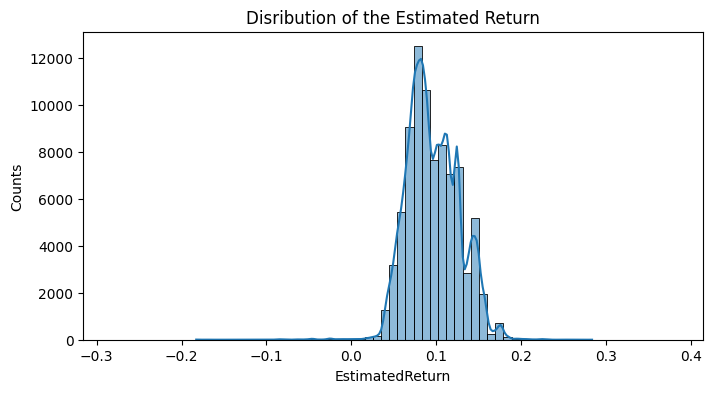

In [44]:
plot_hist(df = df_load_study_cln, target_value="EstimatedReturn", title="Disribution of the Estimated Return")

> The distribution of the Estimated Return is unimodal, but not perfectly distributed, with the biggest peak around 0.1.<br>
> Some negative values are identified, but not so many (almost insignificant enough to be discarded)

In [45]:
# Checking the negative Returns
df_load_study_cln[df_load_study_cln["EstimatedReturn"] <0].sample(10)

,ListingKey,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,EstimatedReturn,BorrowerRate,ProsperRatingAlpha,ProsperScore,...,InquiriesLast6Months,CurrentDelinquencies,DelinquenciesLast7Years,BankcardUtilization,IncomeRange,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,Recommendations,QuarterCreditPulled
77549,CC393491765818171671DB7,2010-08-03,36,Chargedoff,2011-11-15,0.38723,-0.0461,0.3500,HR,1,...,13,9,0,0.54,"$100,000+",10416.666667,0,7500,1,Q3
80371,F6E13478114370526251C1C,2010-03-15,36,Completed,2010-10-15,0.37453,-0.0251,0.3500,HR,1,...,3,3,33,0.93,"$50,000-74,999",5000.000000,2,5000,0,Q1
65056,F1FF3476190215945003258,2010-02-26,36,Completed,2013-03-08,0.37453,-0.0251,0.3500,HR,1,...,4,1,0,0.99,"$25,000-49,999",3345.000000,0,3000,0,Q1
29421,79B5346792685252184743D,2009-10-28,36,Completed,2012-10-19,0.17464,-0.0102,0.1529,E,8,...,0,0,0,0.82,Not employed,0.000000,1,2100,0,Q4
46457,6CF03483860890418866BF9,2010-05-26,36,Completed,2011-04-06,0.38723,-0.0461,0.3500,HR,1,...,4,0,18,0.85,"$50,000-74,999",6208.333333,1,1750,0,Q3
3371,06C634936764915582779CD,2010-09-07,36,Chargedoff,2013-05-18,0.37699,-0.0555,0.3400,HR,1,...,9,0,0,0.81,"$100,000+",10650.500000,0,7500,0,Q3
29790,1436346867365925763F311,2009-11-11,36,Completed,2012-04-25,0.23661,-0.0018,0.1988,HR,5,...,2,1,1,0.46,"$25,000-49,999",2380.000000,1,1000,0,Q4
69232,26E434645397643487E8FAA,2009-09-30,36,Completed,2011-02-09,0.38723,-0.0461,0.3500,HR,1,...,3,6,19,0.93,"$25,000-49,999",3000.000000,1,1800,0,Q4
72405,6FC834823486444499C7547,2010-04-28,36,Chargedoff,2012-05-12,0.37453,-0.0251,0.3500,HR,1,...,4,0,10,1.00,"$25,000-49,999",2158.333333,1,4000,0,Q2
5911,2D9B34605941550368990B6,2009-08-24,36,Chargedoff,2013-01-02,0.37453,-0.0251,0.3500,HR,1,...,1,15,99,0.00,"$25,000-49,999",3833.333333,2,1700,0,Q3


In [46]:
df_load_study_cln[df_load_study_cln["EstimatedReturn"] <0].shape

(195, 32)

> Not so many values (Good, otherwise the bank would have serious problems!).<br>
> However, it is possible to see that the Borrower Rating is of a High Risk. One strong indicator to be used in the analysis<br>.

> Let's now take a look at the original amount borrowed

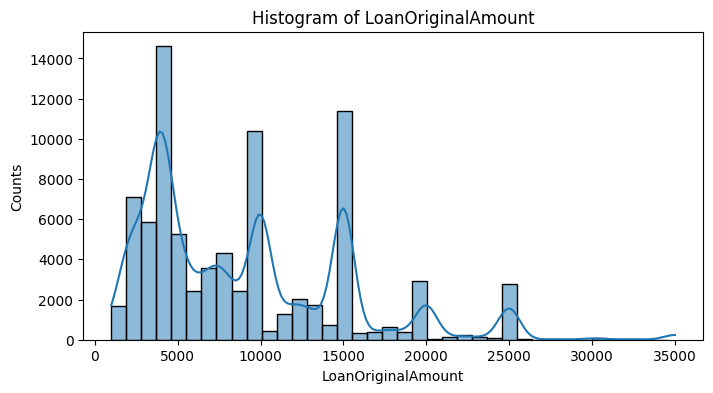

In [47]:
plot_hist(df = df_load_study_cln, target_value="LoanOriginalAmount")


> There are some spikes in some key values around 5k, 10k, 15k, 20k, etc.<br>
> Possibly, there are some default loan values

In [48]:
# Because the variablity of this field is too big, the bins must be defined manually
bins_incoming = np.arange(0,40000,500)

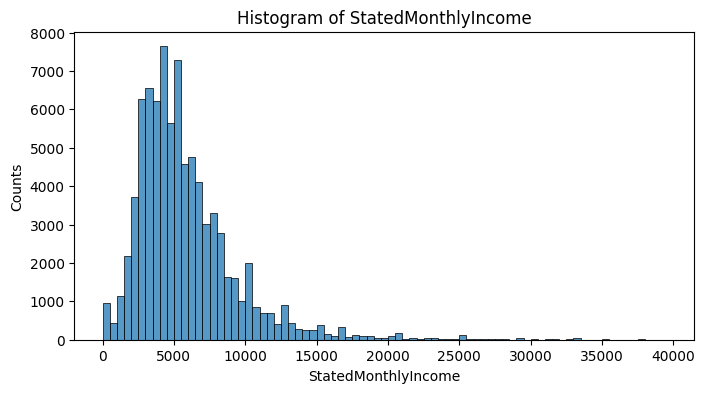

In [49]:
plot_hist(df = df_load_study_cln, target_value="StatedMonthlyIncome", bins = bins_incoming, kde = False)

> The distribution of the monthly income is right skewed, with most of stated monthly income less than 20k.<br>
> Possibly, the values above 30k are outliers and should be discarded.<br>
> Let's check the amount of records that would be discarded:

In [50]:
(
    df_load_study_cln.query("StatedMonthlyIncome > 30000 ").shape[0],
    df_load_study_cln.query("StatedMonthlyIncome > 30000 ").shape[0]
    / df_load_study_cln.shape[0]
    * 100,
)

(246, 0.2929199114095878)

> ~250 Records or ~0.3% of the dataset. This is acceptable.<br>
> So for the next analysis we will discard montly incomes above 30k.

In [51]:
df_loans_filtered = df_load_study_cln.query("StatedMonthlyIncome < 30000 ").reset_index(
    drop=True
)

> For each categorical field in the dataset, let's check the distribution.<br>
> Additionally, even though it is not defined as categorical, the `Term` will be included in this analysis.

In [52]:
cat_cols = list(df_load_study_cln.select_dtypes(include="category").columns)
cat_cols.append("Term")

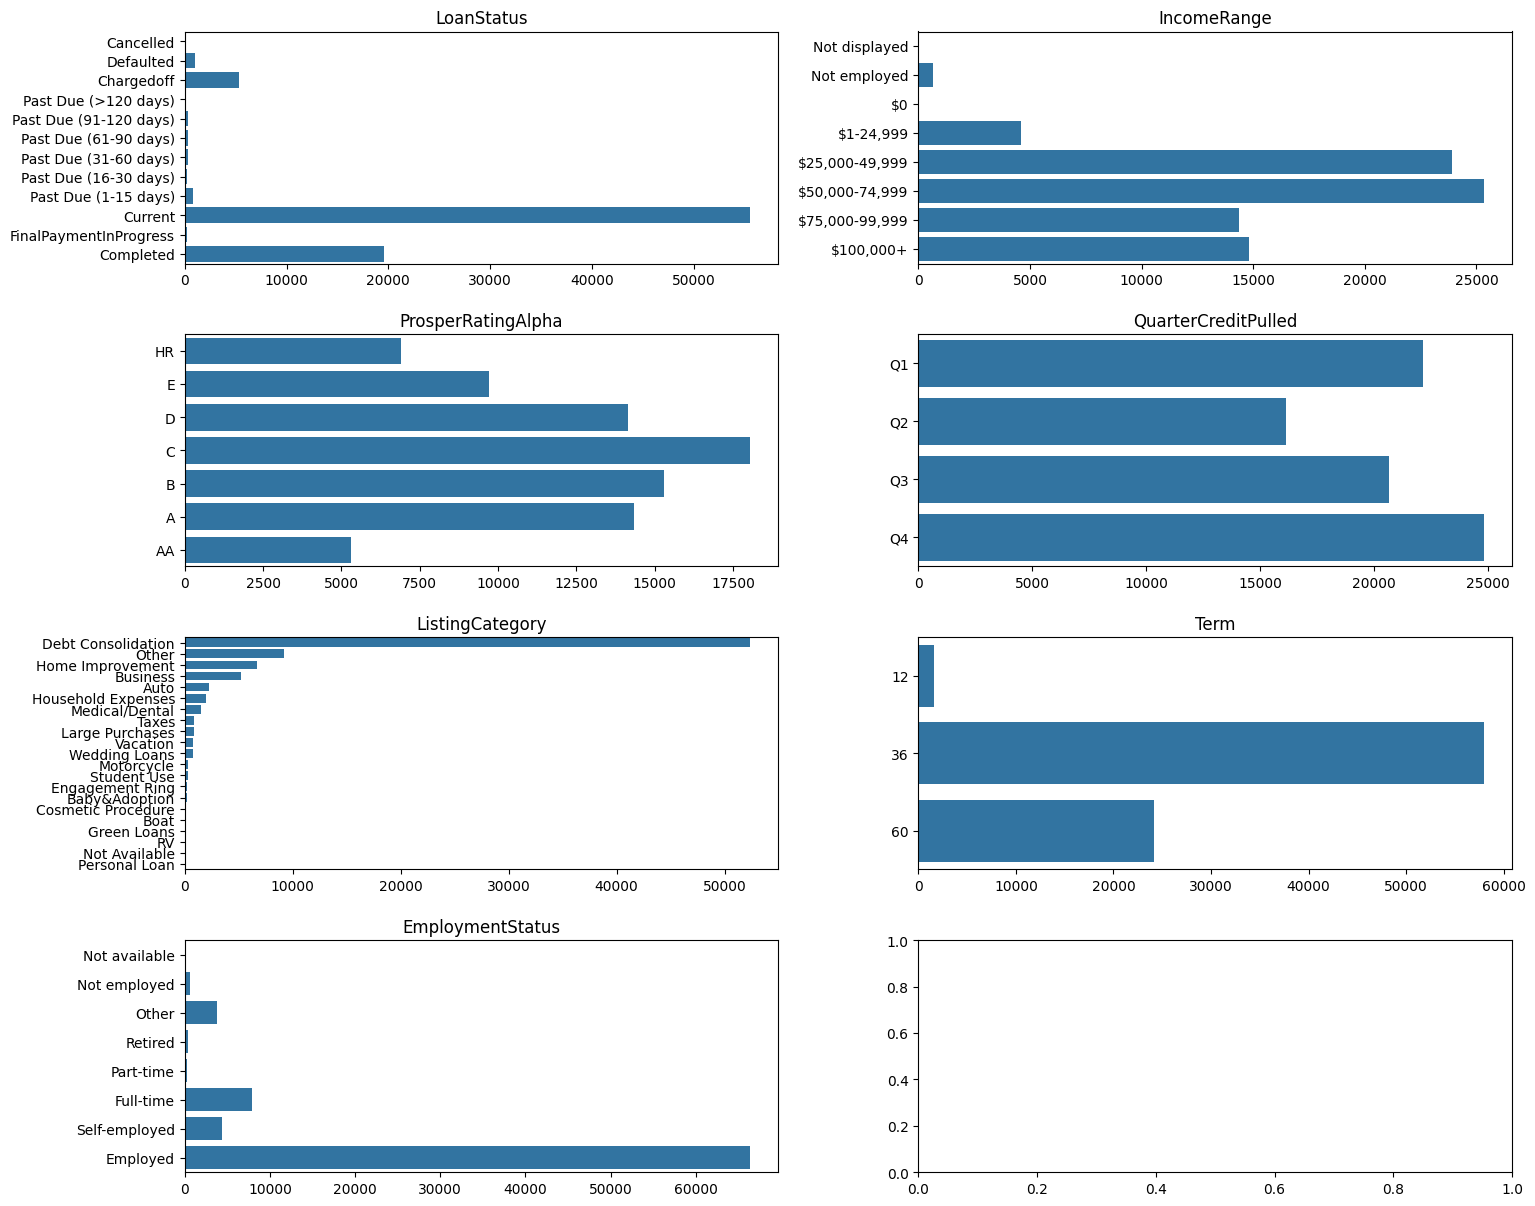

In [53]:
rows = int(np.ceil(len(cat_cols)/2))
fig, ax = plt.subplots(nrows=rows, ncols = 2,figsize = [14,12])
fig.tight_layout(h_pad=3, w_pad=7)
n = 0
for j in range(2):
    for i, col in enumerate(cat_cols[n:n+rows]):

        if df_loans_filtered[col].dtype == 'int64' or df_loans_filtered[col].dtype.ordered :
            
            sb.countplot(data=df_loans_filtered, 
                         y=col, 
                         color=default_color, 
                         ax=ax[i][j])
            ax[i][j].title.set_text(col)
            ax[i][j].set(xlabel=None)
            ax[i][j].set(ylabel=None)
        else:
            sb.countplot(data=df_loans_filtered, 
                         y=col, 
                         color=default_color, 
                         ax=ax[i][j], 
                         order= df_loans_filtered[col].value_counts().index)
            ax[i][j].title.set_text(col)
            ax[i][j].set(xlabel=None)
            ax[i][j].set(ylabel=None)
    n +=n+rows

> - The big majority of the loans have a 36 months term; 
> - Most of the borrowers are employed;
> - The `LoanStatus` are highly concentrated in Current or Completed, but there is a significant peak in ChargedOff
> - The Loans are almost evenly pulled among the quarters. The highest value in the Q4 can be justified by the Christmas Holidays<br>
> The big majoroty of the loans are to Consolidate other Debts. Maybe this can be associated to small credits (to pay credit card debts, for instance).


In the sequence, let's see other fields that might bring good insights<br>

In [54]:
other_features = ['EmploymentStatusDuration',
                  'CurrentCreditLines', 
                  'OpenCreditLines', 
                  'TotalCreditLinespast7years', 
                  'InquiriesLast6Months', 
                  'DelinquenciesLast7Years', 
                  'BankcardUtilization',
                  "ProsperScore",
                  ]

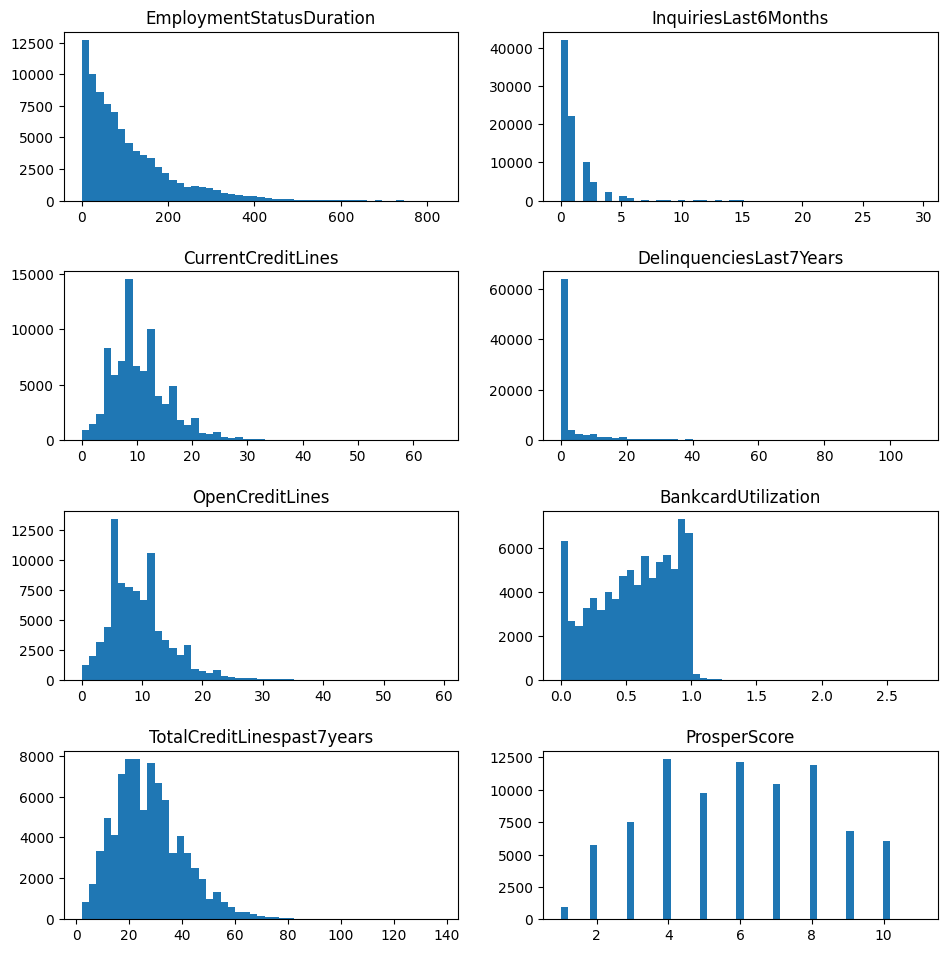

In [55]:
rows = int(np.ceil(len(other_features)/2))
fig, ax = plt.subplots(nrows=rows, ncols = 2,figsize = [10,10])
fig.tight_layout(pad = 3)
n = 0
for j in range(2):
    
    for i, v in enumerate(other_features[n:n+rows]):
        bins = np.linspace(df_loans_filtered[v].min(), df_loans_filtered[v].max()*1.1)
        ax[i][j].hist(data = df_loans_filtered[other_features].fillna(0), x = v, bins = bins)
        ax[i][j].title.set_text(v)
    n +=n+rows

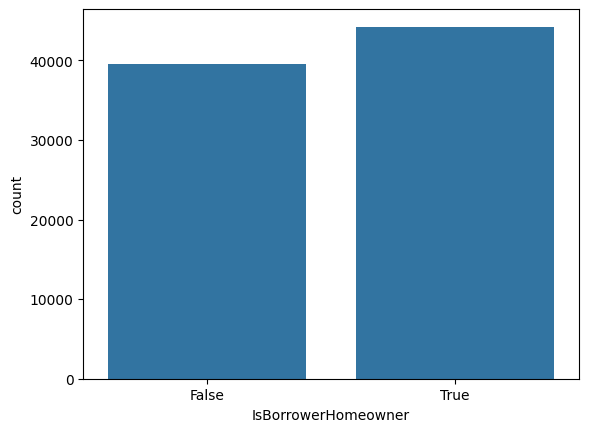

In [56]:
# One last varible to check
sb.countplot(data=df_loans_filtered, 
                         x='IsBorrowerHomeowner', 
                         color=default_color);

> - The Employement Status Duration is skewed to the right. Most of the borrowers are less than 100 months in their status condition;<br>
> - Most of the borrowers are have no delinquences, open or historically;<br>
> - Most of the borrowers have several credit lines open and use very few percentage of their credit card.<br>
> In this point I can dare to say that, due to the high atractiveness of the loans and the high credit card taxes, a loan is a better option in comparison to use your credit card.

In [57]:
df_loans_filtered.ListingCategory.dtype.ordered

False

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of the Estimated Return is unimodal, but not perfectly distributed, with the biggest peak around 0.1.<br>
> There are some negative values, but it is expected, since the bank can get a loss in a transaction.<br>
> No transformations had to be done to get to the conclusions.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The dataset was filtered with only values after July/2009. That because the Estimated Return is measured as of this period only. This shrinked the datased in around 30%, leaving us with around ~83k records out of ~120k.<br>
> Missing values in the Ocupation field were filled in as **Not Defined** and with 0 in the field Employment Status Duration. The same was done to Total Prosper Loans, following the documentation.<br>
> About the data distribution, monthly income is right skeewed. Most of the monthly incomes are less than 30k. Records above this value represent less than 0.5% of the records, namenly outliers. So, they were discarded from the dataset.<br>
> Most of the borrowers have several credit lines open and use very few percentage of their credit card.<br> 
In this point I can dare to say that, due to the high atractiveness of the loans and the high credit card taxes, a loan is a better option in comparison to use your credit card.<br>
> The Prosper Score shows peaks in 4, 6 and 8. These values are relatively smaller, if comparing to Prosper Rating Alpha. Possibly, these scores have distinct calculation methods.<br>
> The distribution of Home owners and No Home owners is practically even. I think that this variable is not so strong related to the Estimated Return


## Bivariate Exploration

> I will start working with the variants that have showed some potential in the previous analysis

In [58]:
# I will pick those variables that showed interesting behaviour in the previous analysis
num_features = ["EstimatedReturn", 
            "StatedMonthlyIncome",
            "LoanOriginalAmount",
            "Term",
            "BorrowerAPR",
            "ProsperScore",
            "CurrentDelinquencies",
            "InquiriesLast6Months"]


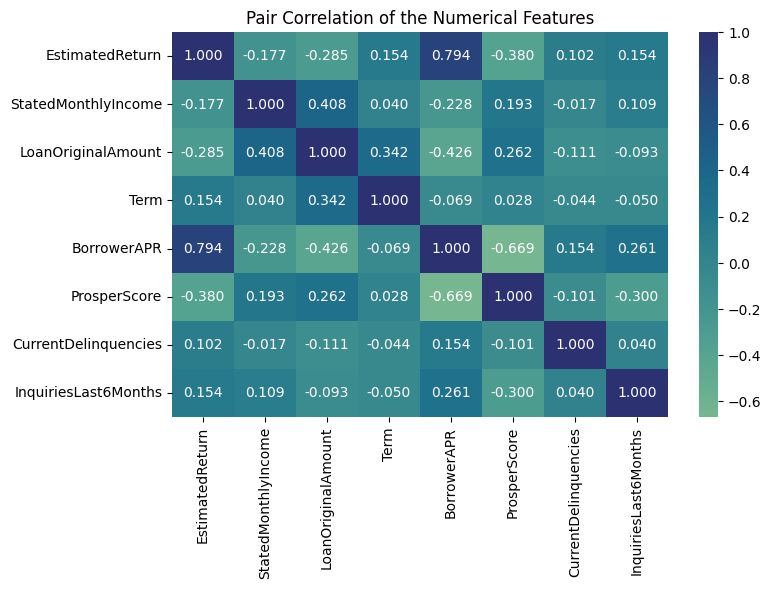

In [59]:
plt.figure(figsize = [8, 5])
sb.heatmap(df_loans_filtered[num_features].corr(), annot = True, fmt = '.3f',cmap = 'crest',center = 0)
plt.title("Pair Correlation of the Numerical Features", fontsize = 12);

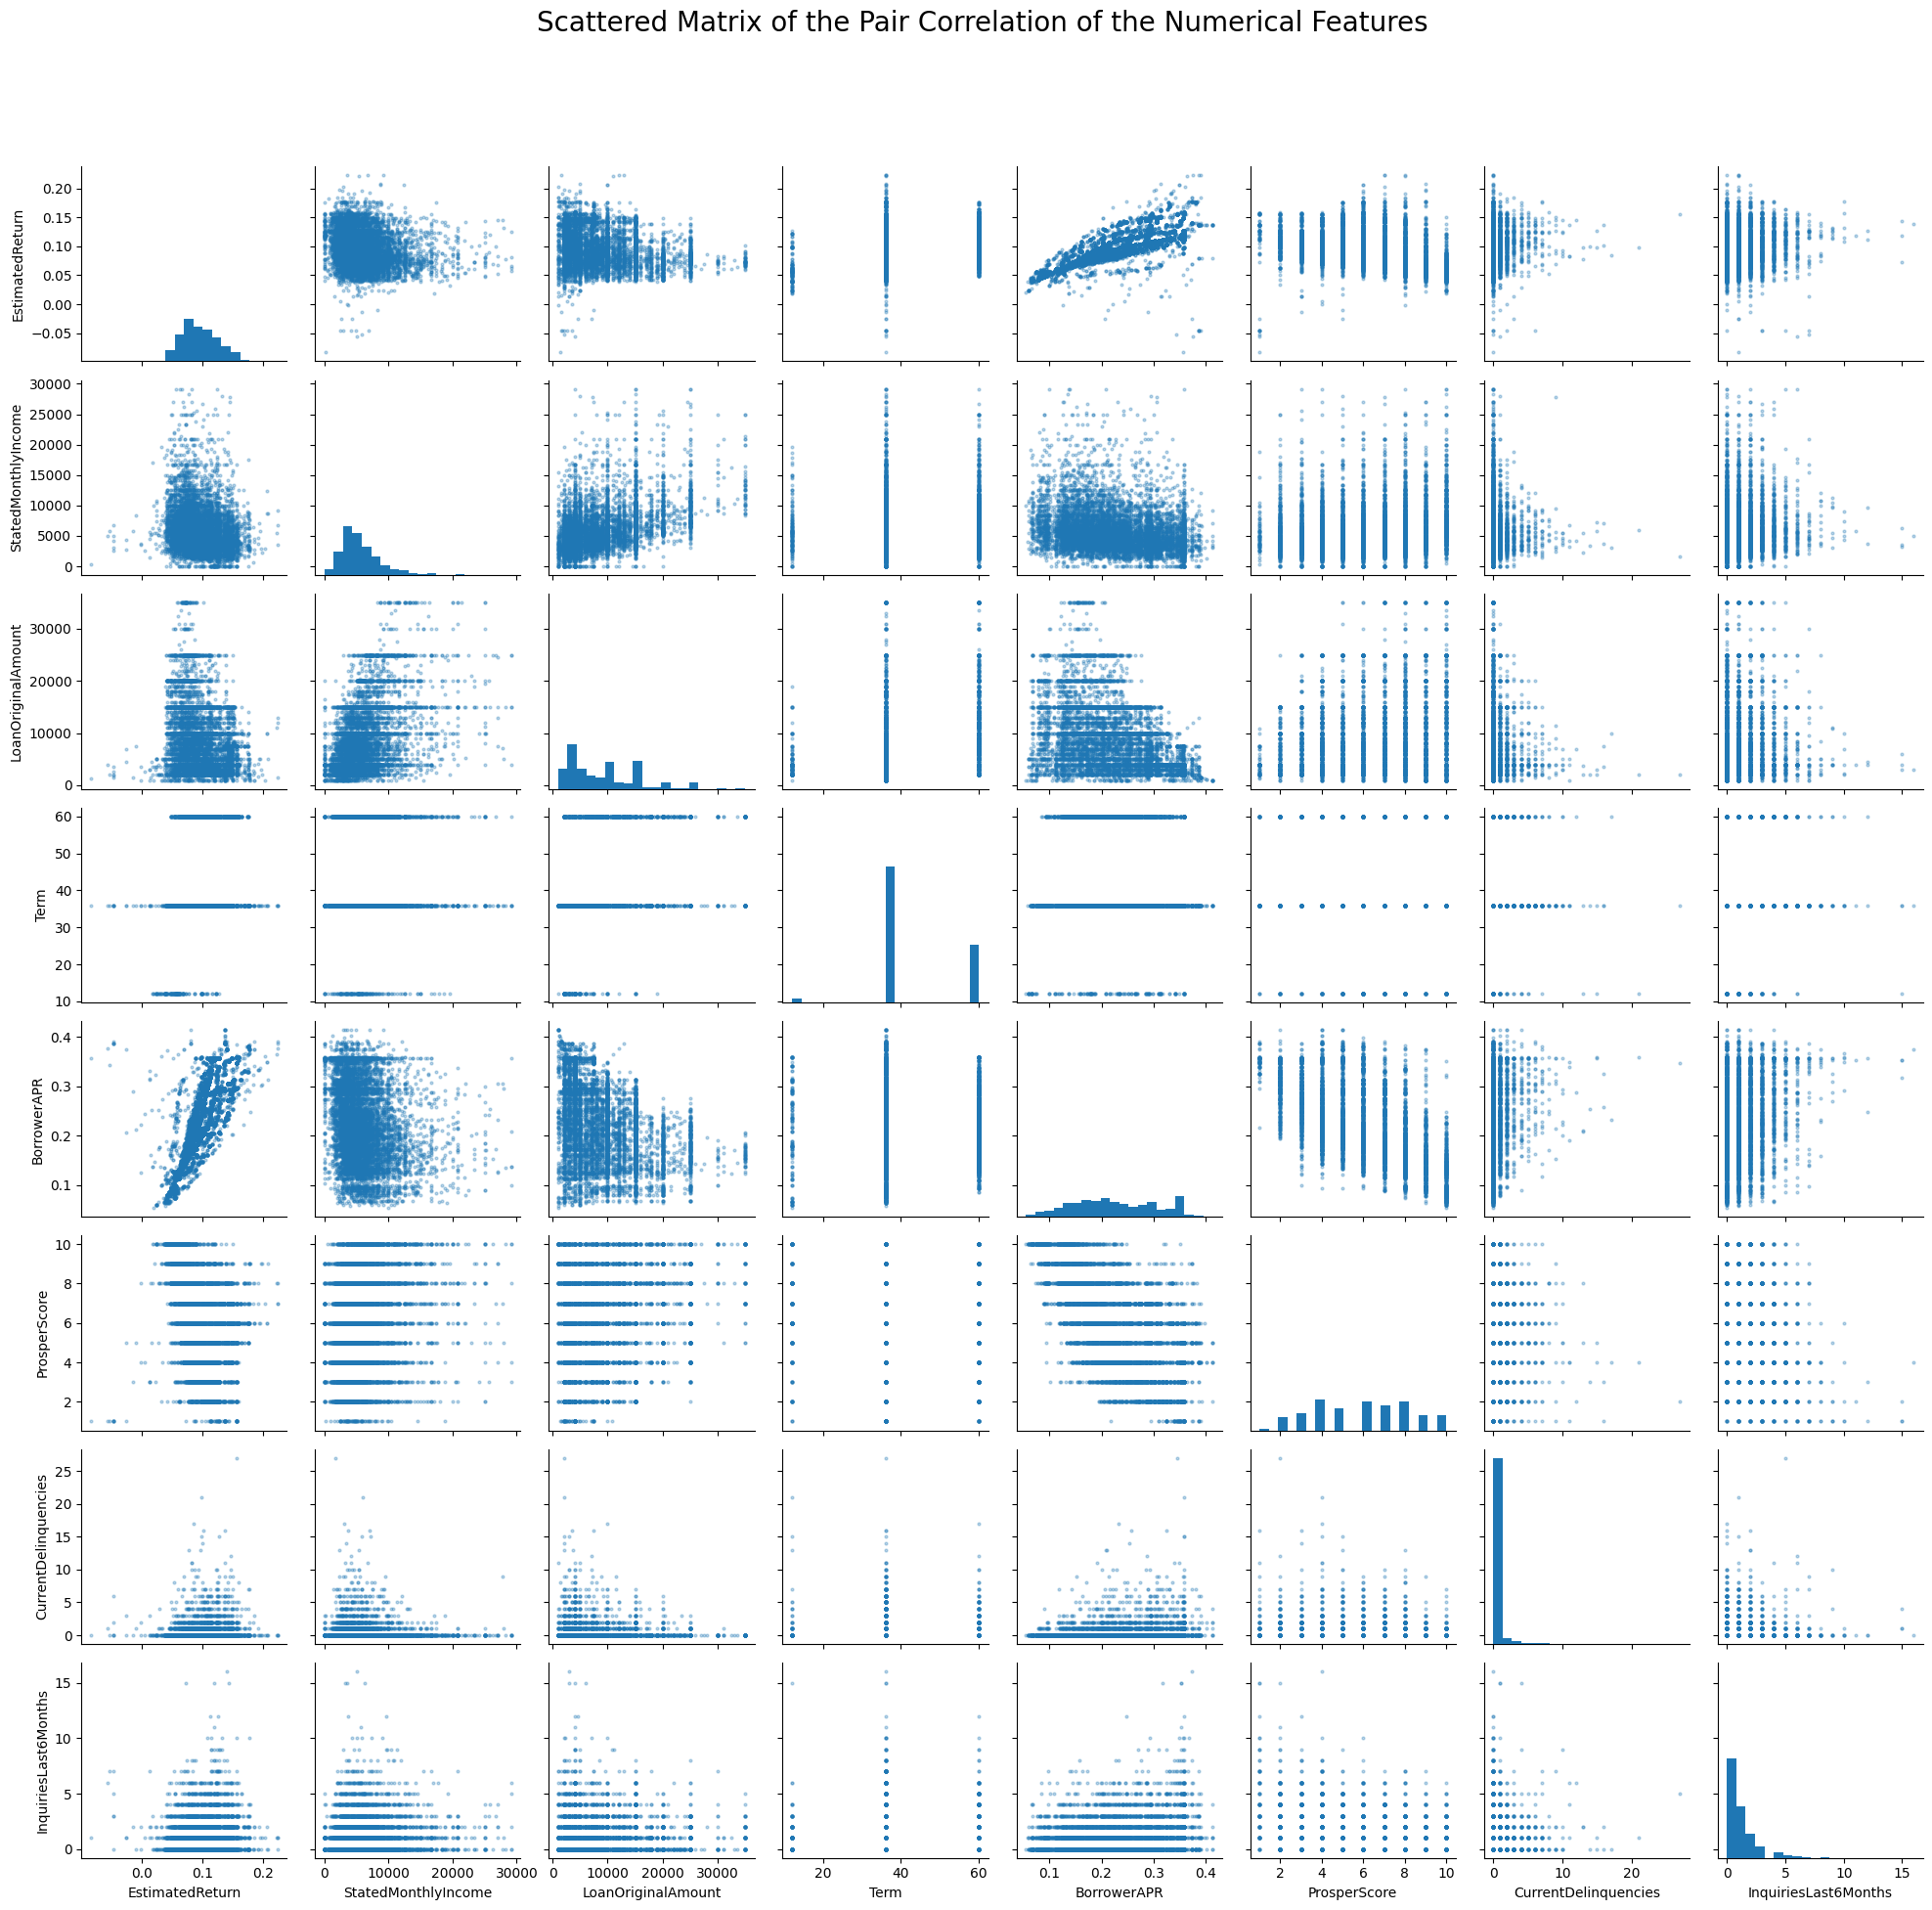

In [60]:
# To preserve RAM memory and get a clearer view, I will make a sample of 10% of the original records from the data

df_loan_sample = df_loans_filtered.sample(round(df_loans_filtered.shape[0]*.1), replace=False)

g = sb.PairGrid(data = df_loan_sample, vars = num_features)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha = 0.3, s = 4)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Scattered Matrix of the Pair Correlation of the Numerical Features", fontsize = 20);

> Immediately we can see that the Borrower APR has a strong correlation (according to Pearson's Range) to the estimated return.<br>
> We have a negative and weak  correlation coefficient between the loaned amount and the estimated return. In the scattered plot, we can see a slight negative angle in the values plot, corroborating the hypotesis.<br>

> In other words, the more a customer loans, the less the bank expects to earn. We can justify this by thinking that, for the bank there are kind of "ideal" range of values to borrow. In the sequence, I split the loan in the 5 (see [here](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html#pandas.qcut) the documentation) most frequent ranges to see if higher values can highlight this inverse correlation.<br>

> Income and loan are positively correlated, yet weak. But it makes sense to think that, the more you earn, the more you borrow.<br>

> I was expecting that the Delinquencies and Inquiries in the Last 6 Months would bring a better correlation to the Estimated Return. Also, what surprised me is the fact that these two features have almost no correlation to each other. Because, normally, a delinquent borrower would ask more often for money and the numbers don't show that.<br>

> Because the varible term is discrete and only has three acceptable values, it will be treated as a categorical feature from now on.



In [61]:
cat_features = ['ProsperRatingAlpha',
            'Term',
            'EmploymentStatus',
            'QuarterCreditPulled']

In [62]:
#Adding a column to split the Loan in 5 ranges 
df_loans_filtered["LoanRange"] = pd.qcut(df_loans_filtered["LoanOriginalAmount"],5)

<AxesSubplot:xlabel='LoanOriginalAmount', ylabel='EstimatedReturn'>

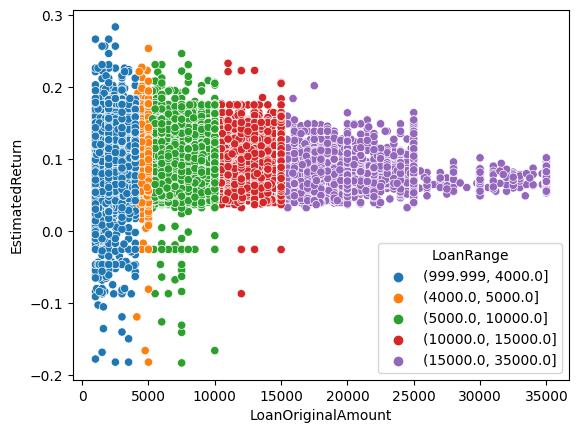

In [63]:
sb.scatterplot(data = df_loans_filtered, y = 'EstimatedReturn', x = "LoanOriginalAmount", hue = 'LoanRange')

> We can notice that in the lowest loans, theres practically no slope. When the loan increases above 15k, we can notice a negative slope. Possibly there, is the good return limit for the bank.<br>

> In the sequence, let's check the categorical values.

> In the next analysis, I will cross the numerical features that showed a better correlation to the Estimated Return and see how they interact.<br>
> Because the fatures `BorrowerState` and `ListingCategory` have too many values, they will be evaluated separately. 

In [64]:
# Discarding the feature that showed the least correlation to the estimated return
interest_num_feat = num_features.copy()
interest_num_feat.remove("CurrentDelinquencies")
interest_num_feat.remove("Term")
interest_num_feat

['EstimatedReturn',
 'StatedMonthlyIncome',
 'LoanOriginalAmount',
 'BorrowerAPR',
 'ProsperScore',
 'InquiriesLast6Months']

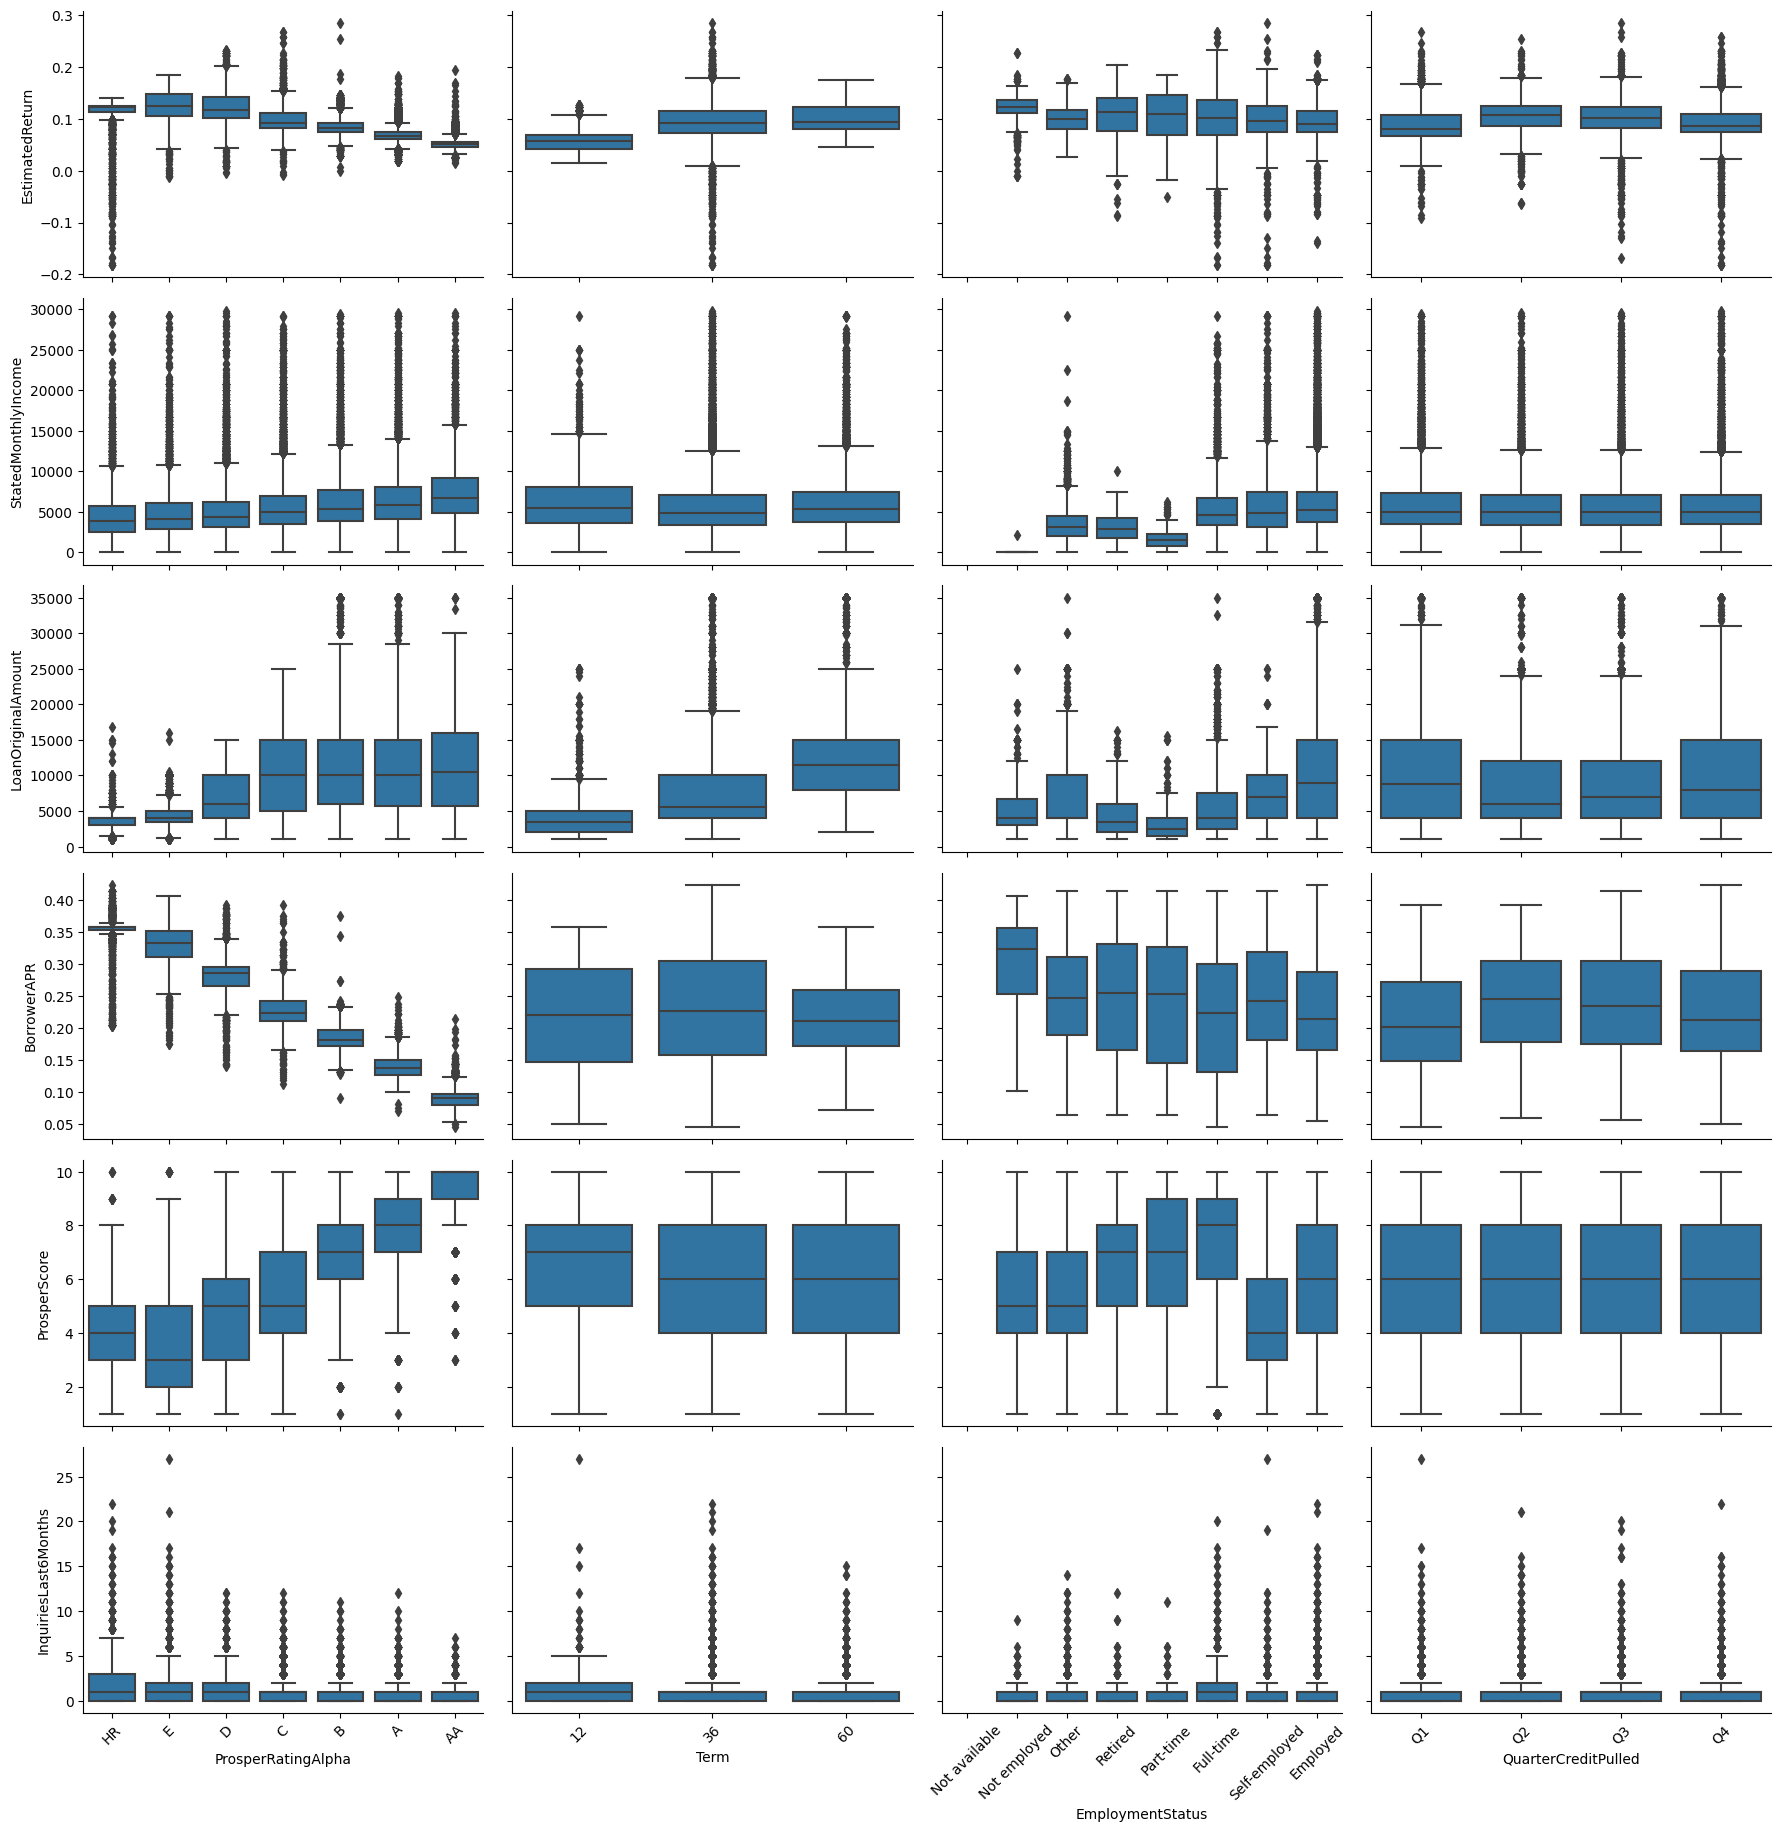

In [65]:
# Again, a sample to get faster results

df_loan_sample = df_loans_filtered.sample(round(df_loans_filtered.shape[0]*.1), replace=False)

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    
    sb.boxplot(x=x, y=y, color = default_color)

g = sb.PairGrid(data = df_loans_filtered, 
                y_vars = interest_num_feat, 
                x_vars = cat_features,
                height = 3, 
                aspect = 1.5)
for ax in g.axes.flatten():
    ax.tick_params(axis = 'x', rotation = 45)
g.map(boxgrid);

> We can see that the loan amount increases with the increase of loan term. This makes sense, because long term loans are normally related to more expensive goods, like a car or a house.<br> 
> The estimated return decreases the higher the borrower rating is. We can't avoid to tell that there is a lot of outliers in this plot. But one conclusion can be that the Prosper rating has a strong effect on the estimated return. The same happens with the Borrower APR, and that is expected, since it has a strong correlation to the Estimated Return.<br>
> No surprises are the fact that Borrowers with better rating also have slightly larger monthly income and, consequently loan higher amounts. But with a higher variability. <br>
> Employed borrowers have the highest average loans in comparison the others.<br>
> The quarter when the borrower lends the money practically doesn't affect the other features, so, it will be discarded from the next explorations.

In [66]:
interest_cat_feat = cat_features.copy()
interest_cat_feat.remove("QuarterCreditPulled")
interest_cat_feat

['ProsperRatingAlpha', 'Term', 'EmploymentStatus']

> Let's play with other features, like Borrower state, for instance

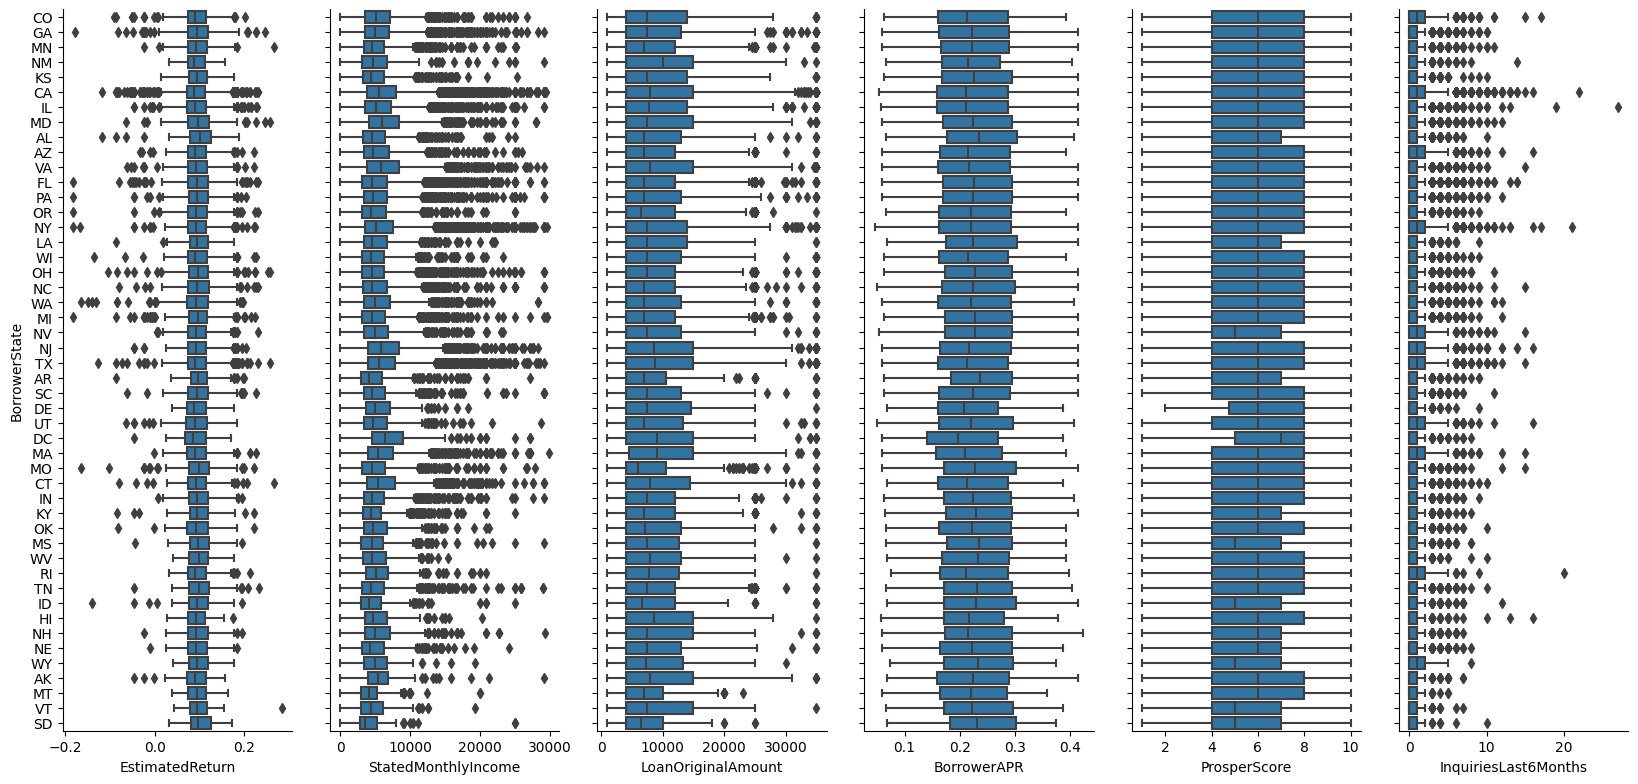

In [67]:
g = sb.PairGrid(data = df_loans_filtered, 
                x_vars = interest_num_feat, 
                y_vars = ["BorrowerState"],
                height = 8, 
                aspect =0.35,
                
               )

g.map(boxgrid);


> Despite the quality of the chart, due the amount of classes, we can see that for all the three features analised, we don't see much difference in terms of variability, mean and outliers. Specially in the estimated return (it's practically the same for each state).<br>
> I believe this feature can be discarded from the analysis.


> What about the Loan Category?

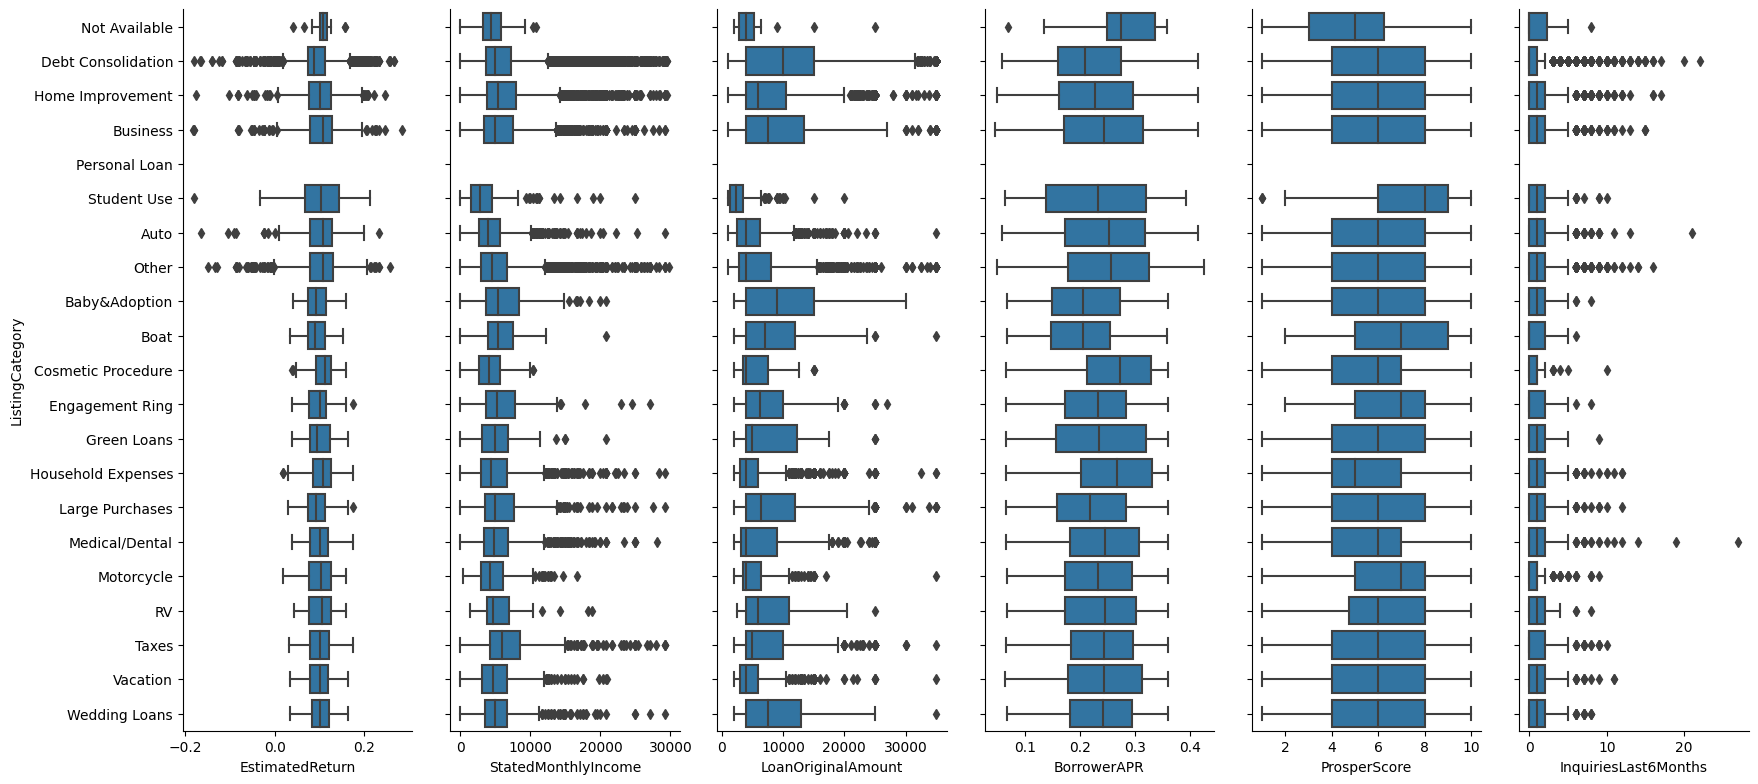

In [68]:
g = sb.PairGrid(data = df_loans_filtered, 
                x_vars = interest_num_feat, 
                y_vars = ["ListingCategory"],
                height = 8, 
                aspect = 0.35,
                
               )

g.map(boxgrid);


> The estimated return doesn't vary to much. Except for Studend use, when we notice a wider variability, but a similar mean, in comparison to the other categories.<br>
> The highest loan amount mean is for Baby adoption and its APR mean is one of the smallest. Possibibly because the bank offers lower interest rate to these type of loans.<br>
> Interesting to see that Cosmetic procedures are more concentrated to low income borrowers and they have a higher APR.<br>
> Despite the fact that I don't see much strenght in this feature, I will create a new category column with the top 5 categories merge the rest as `other categories`, just to see how this variable would relate.

In [69]:
# For that, I will ignore the category Other and pick the next highest one
top5_cat = df_loans_filtered.ListingCategory.value_counts().head(6).index.to_list()

In [70]:
df_loans_filtered["Top5ListingCategory"] = np.where(df_loans_filtered["ListingCategory"].isin(top5_cat), 
                                                    df_loans_filtered["ListingCategory"], "Other")

In [71]:
# This field will be set as category, but it is not necessary that it be ordered
unordered_category = pd.api.types.CategoricalDtype(
    ordered=False, categories=top5_cat
)
df_loans_filtered["Top5ListingCategory"] = df_loans_filtered["Top5ListingCategory"].astype(
    unordered_category
)

In [72]:
cat_pairs = [
    {"x":"ProsperRatingAlpha", 
     "hue": "Term", 
     "color": "Blues"
    },
    {"x":"EmploymentStatus", 
     "hue": "Term", 
     "color": "Blues"
    },
    {"x":"EmploymentStatus", 
     "hue": "ProsperRatingAlpha", 
     "color": "Greens"
    },
    {"x":"Top5ListingCategory",
     "hue": "Term",
     "color": "Blues"
    },
    {"x":"EmploymentStatus",
     "hue": "Top5ListingCategory",
     "color": "YlOrBr"
    }
    
         ]

> In order to have a clear view of the distribution within the groups, I will do a plot with the proportional class distribution to each group.<br>
> This means that the percentage seen in each class correspond to the distribution of the "hue" in that class, not in the full dataset. This allows us to highlight the interactions inside each class

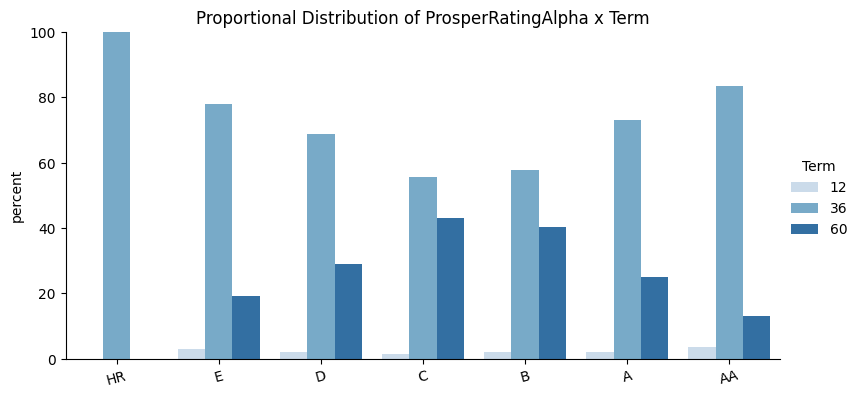

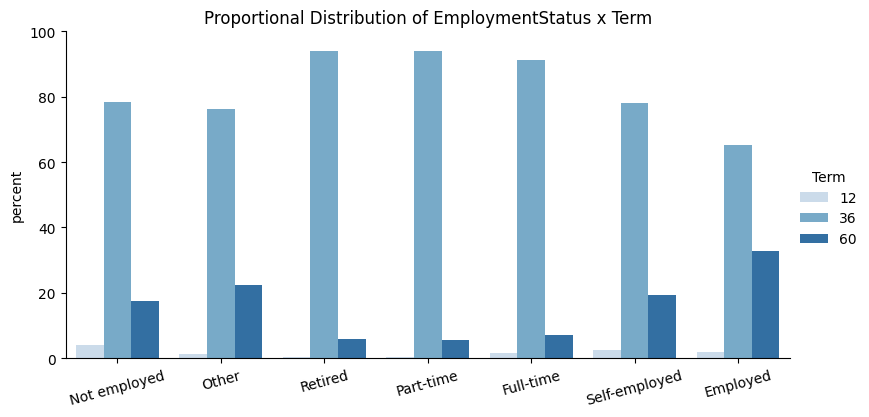

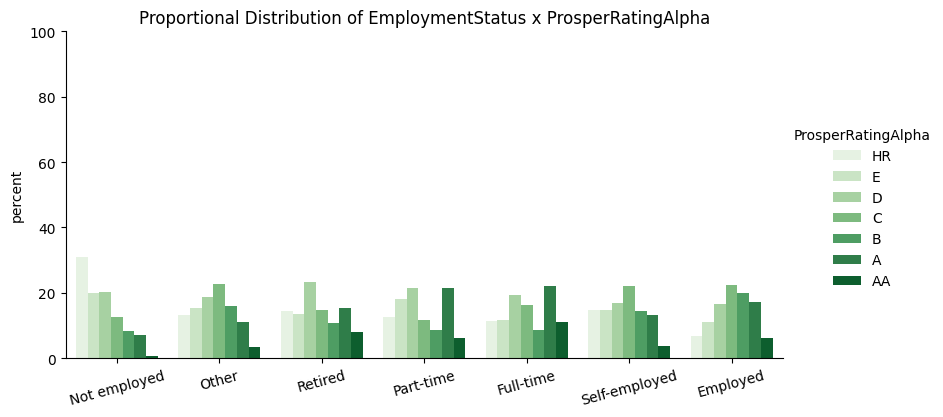

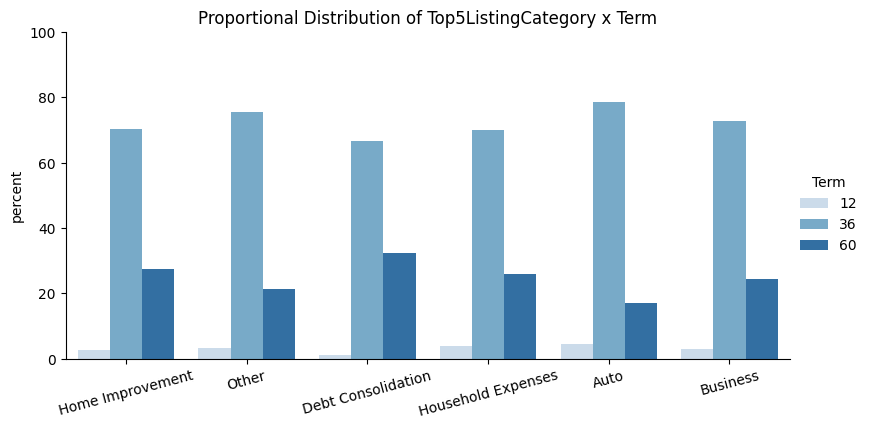

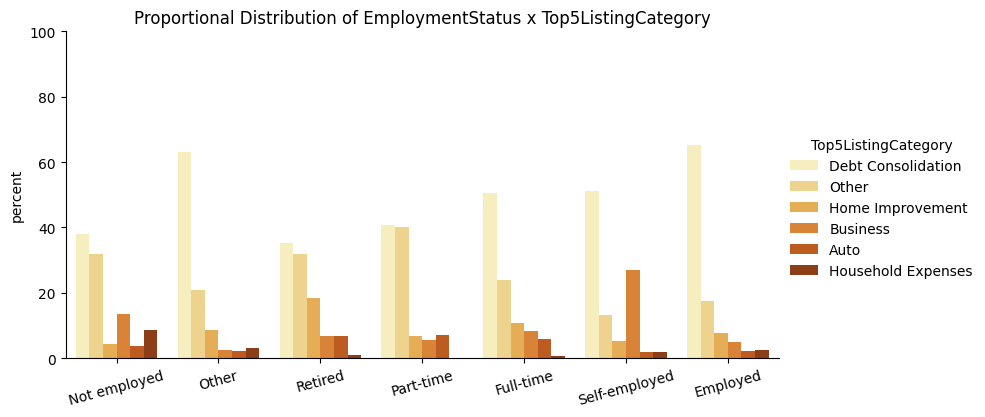

In [73]:
df = df_loans_filtered.copy()
for i,p in enumerate(cat_pairs):
    x = cat_pairs[i]['x']
    h = cat_pairs[i]['hue']
    c = cat_pairs[i]['color']
    df_norm = df.groupby(by = x, observed = True)[h].value_counts(normalize = True)
    df_norm = df_norm.mul(100)
    df_norm = df_norm.rename('percent').reset_index()
    df_norm = df_norm.rename(columns = {df_norm.columns[1]: h})
    g = sb.catplot(x = x, 
                   y = "percent", 
                   hue = h, 
                   kind = 'bar', 
                   data = df_norm, 
                   palette = c,
                   height = 4,
                   aspect = 2
                  )
    g.ax.set_ylim(0,100)
    g.set_xticklabels(rotation = 15)
    plt.xlabel(None)
    plt.title(f"Proportional Distribution of {p['x']} x {p['hue']}")

> In this plot, it is possible to see that borrowers from the rating level B and C lend mononey with longer terms, if compared to the other classes.<br>
> When it comes to employment status, the proportion is roughly the same to each class, except that employed borrowers lend money with higher terms. This can be explained by the fact that these people have the feeling of having the comfort of a guaranteed income at the end of the month, while part time or self-employed don't dare to take risks at a long term.<br>
> Not employed borrowers are mostly in the High Risk Group of ProperRating. In other hand, Full-Time and Employed are in more concenrated in the highest ratings.<br>
> After Debt Consolidation, Other is the 2nd most common borrow category. Except for the Self-employed, which is for Business.
Retired borrowers have more loans to Home Improvement more than any other group.

> Following the preliminary look at bivariate relationships out of the way, I want to see how the Estimated Return and loan original amount are related to one another together with the monthly income in a closer view.<br>


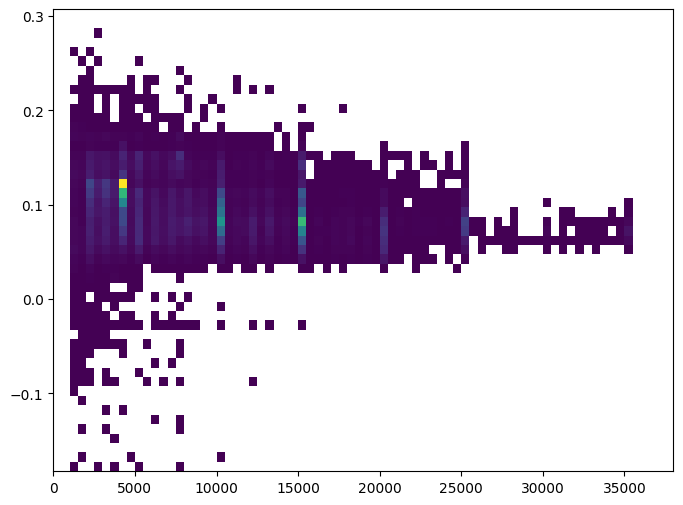

In [74]:
plt.figure(figsize = [8, 6])
bins_x = np.arange(0, df_loans_filtered['LoanOriginalAmount'].max()*1.1,500)
bins_y = np.arange(df_loans_filtered['EstimatedReturn'].min(), df_loans_filtered['EstimatedReturn'].max()*1.1,0.01)
plt.hist2d(data = df_loans_filtered, 
           x = 'LoanOriginalAmount', 
           y = 'EstimatedReturn', 
           cmin = 0.5, 
           bins = [bins_x, bins_y],
          );

> This plot shows that at different size of the loan amount, the Estimated Return has a large range.<br>
> Due to the amount of noise, it is hard to see, but if a line was drawn, connecting the lighter points in the chart, we can see that the return decreases with the increase of the loan amount.<br>
> In other words, the estimated return is negatively correlated with loan amount.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The estimated return is negatively correlated with the loan original amount, in other words, the more the loan amount, the lower the estimated return. It also shows that at different size of the loan amount, the Estimated Return has a large range, but the the range of the return decreases with the increase of the loan amount.<br>
> Curiosly, the Prosper rating  decreases the estimated return in higher ratings.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The loan original amount is positively correlated with the stated monthly income, it makes sense since borrowers with higher incomes can loan higher amounts. It also shows that borrowers with better rating also have larger monthly income and loan amount. There is a interaction between prosper rating and term. Proportionally, there are more 60 month loans on B and C ratings.<br>
The proportional distribution show us what we expected: not employed borrowers have lower ratings.<br>
The proportional distribution also show us that the employed borrowers have more loans at longer terms in comparison to the other employment status.

## Multivariate Exploration

> The main thing I want to explore in this part of the analysis is how the categorical variables play into the relationship between the estimated return and the loan original amount.

In [75]:
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    bins_x = np.arange(0, df_loans_filtered['LoanOriginalAmount'].max()*1.1,500)
    bins_y = np.arange(df_loans_filtered['EstimatedReturn'].min(), df_loans_filtered['EstimatedReturn'].max()*1.1,0.01)
    plt.hist2d(x, y, cmap = palette, cmin = 0.5,bins = [bins_x, bins_y])

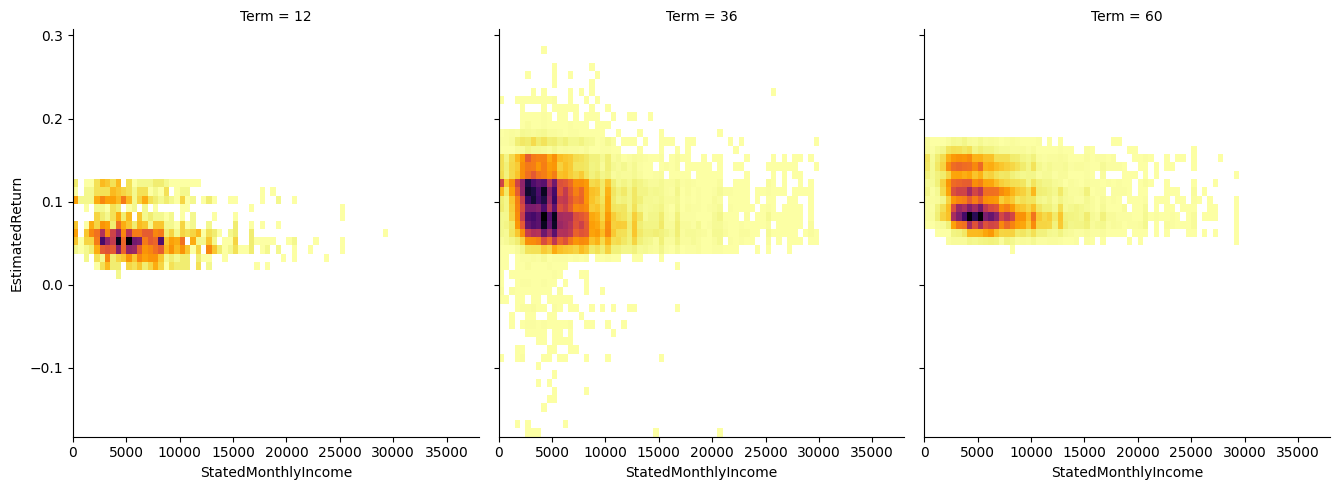

In [76]:
g=sb.FacetGrid(data=df_loans_filtered, height=5,aspect=.9,  col='Term', col_wrap=3)
g.map(hist2dgrid, 'StatedMonthlyIncome', 'EstimatedReturn',color = 'inferno_r')
g.set_xlabels("StatedMonthlyIncome")
g.set_ylabels("EstimatedReturn")

> Term doesn't seem to show much impact on the relationship of the Estimated Return and loan amount.<br>
> We can confirm that because we see much difference in the distribution of the values. But one thing that can be confirmed is that the dispersion on loans of 12 months are less disperse than the others.

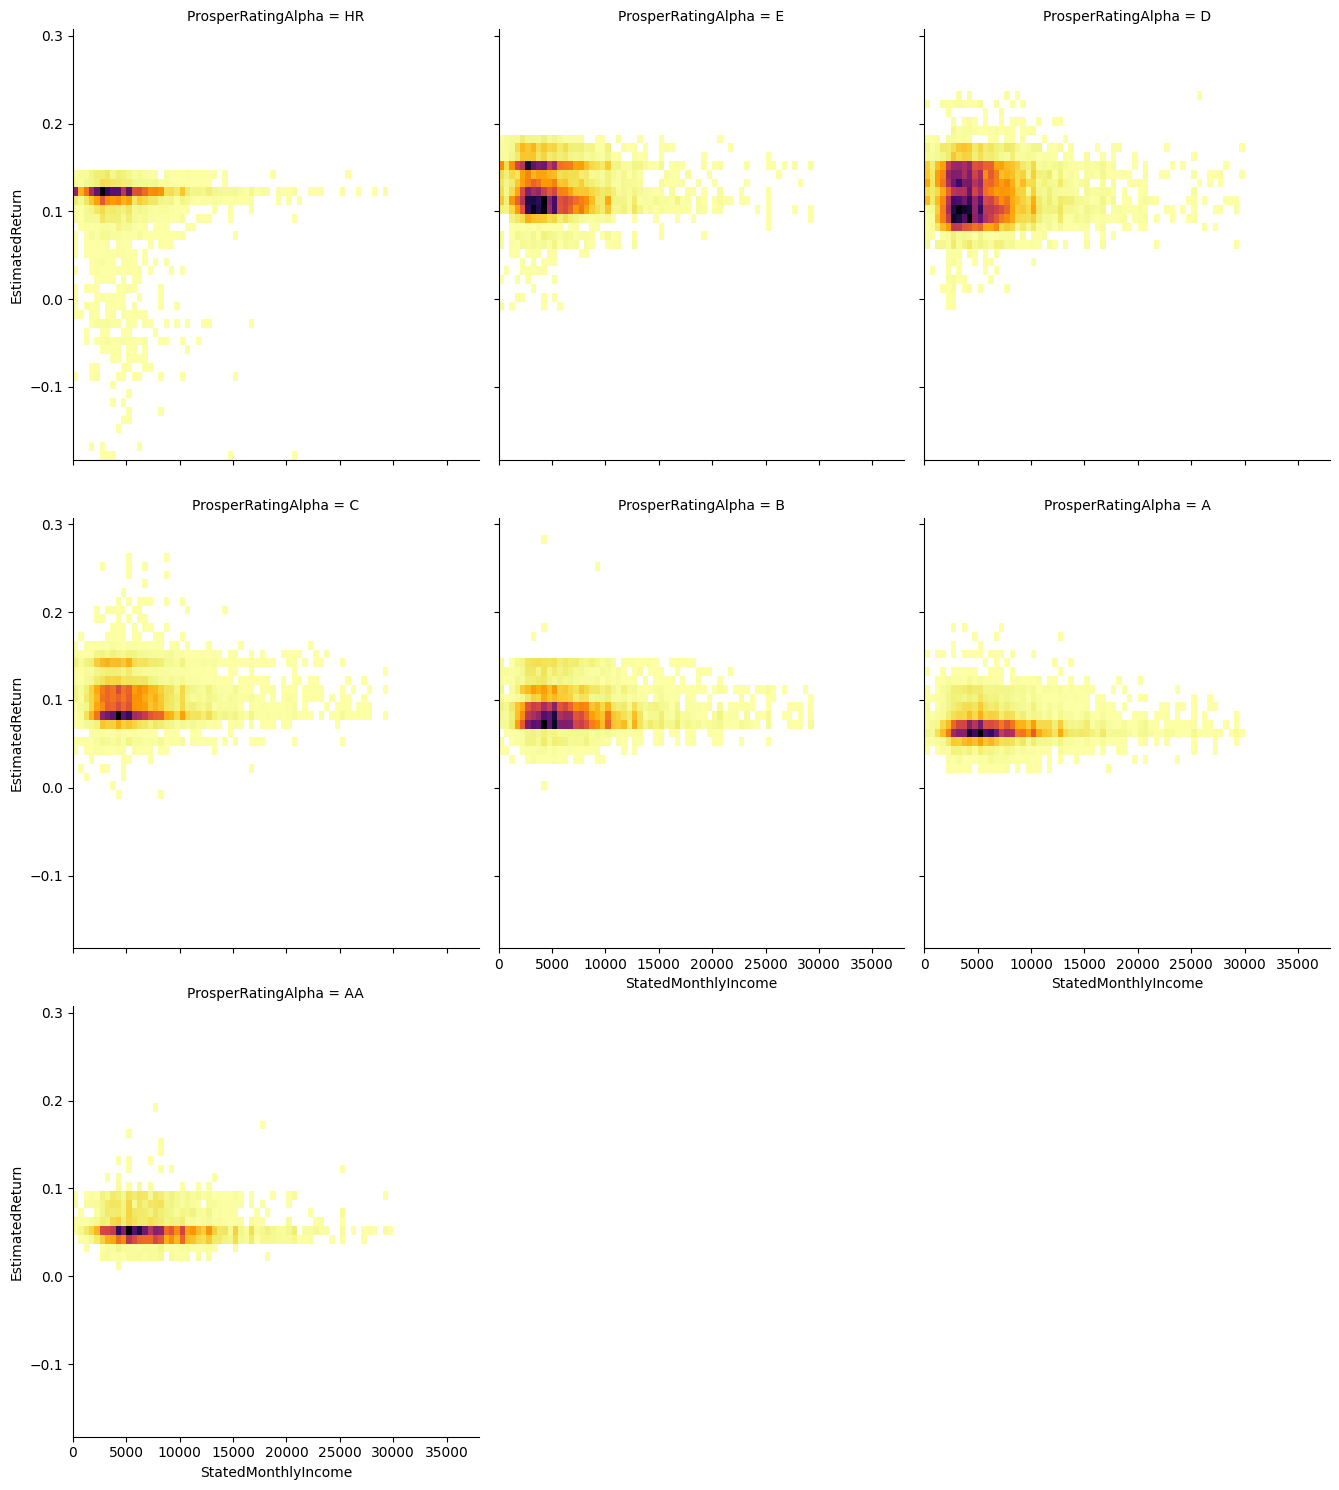

In [77]:
g=sb.FacetGrid(data=df_loans_filtered, height=5,aspect=.9,  col='ProsperRatingAlpha', col_wrap=3)
g.map(hist2dgrid, 'StatedMonthlyIncome', 'EstimatedReturn',color = 'inferno_r')
g.set_xlabels("StatedMonthlyIncome")
g.set_ylabels("EstimatedReturn")

> At a first sight, it is possible to see that the Loan amount range is wider with the increase of the rating.<br>
> The dispersios is bigger in lower rating levels, but when moving to higher ratings we see that the dispersion reduces.
> An interesting fact is seen in the high risk rating (HR). The estimated return seems to reduce dispersion in higher loan amounts, and the returns are higher, in comparison to the AA group. Possibly a niche for the bank to explore.

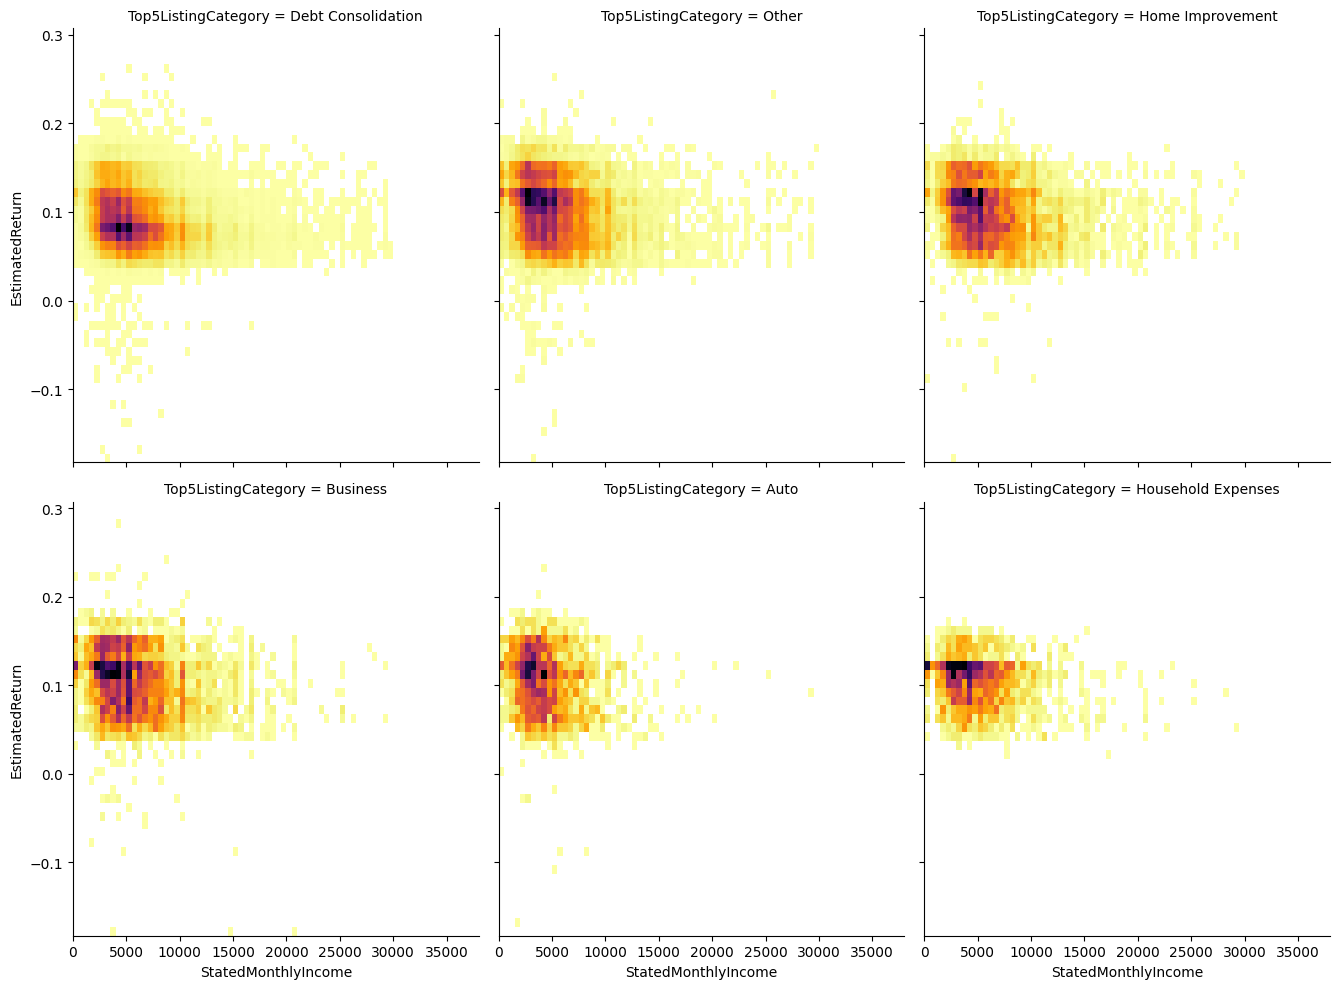

In [78]:
g=sb.FacetGrid(data=df_loans_filtered, height=5,aspect=.9,  col='Top5ListingCategory', col_wrap=3)
g.map(hist2dgrid, 'StatedMonthlyIncome', 'EstimatedReturn',color = 'inferno_r')
g.set_xlabels("StatedMonthlyIncome")
g.set_ylabels("EstimatedReturn")


> Debt consolidation has a big dispersion in return and a long range of incomes.
> The categories of Business, Auto and House Expenses are most common to customers with incomes up to 10k as well.<br>
> Interesting to see that Home Improvement has a long range of Monthly Income. If we link to the bivariate exploration, this is a niche to be explored with the retired customers.


> I see that there is a different behavior in customers with Incomes up to 10k (less dispersive) in comparison to those with higher incomes.<br>
> To have a clearer view, I will split the dataset in two groups and check the return based on Listing Category and Rating 

In [79]:
df_borrower_b10k = df_loans_filtered.copy().query("StatedMonthlyIncome<10000").reset_index(drop = True)
df_borrower_o10k = df_loans_filtered.copy().query("StatedMonthlyIncome>=10000").reset_index(drop = True)

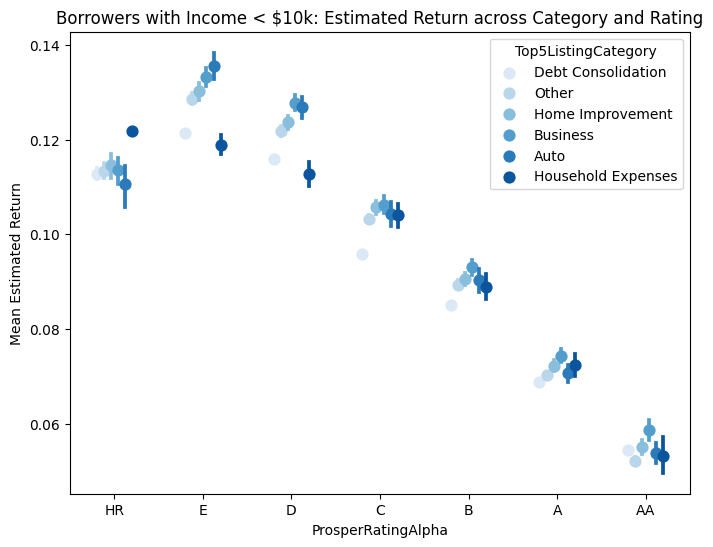

In [80]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_borrower_b10k, 
                  x = 'ProsperRatingAlpha',
                  y = 'EstimatedReturn',
                  hue = 'Top5ListingCategory',
                  palette = 'Blues', 
                  linestyles = '', 
                  dodge = 0.4,
                  errorbar= 'ci')
plt.title('Borrowers with Income < $10k: Estimated Return across Category and Rating')
plt.ylabel('Mean Estimated Return')
ax.set_yticklabels([],minor = True);

> In the plot above, it is clear that the Rating has a strong effect in the return. We see that, customers of the Group E have the best return when the borrow is related to an Auto.<br>

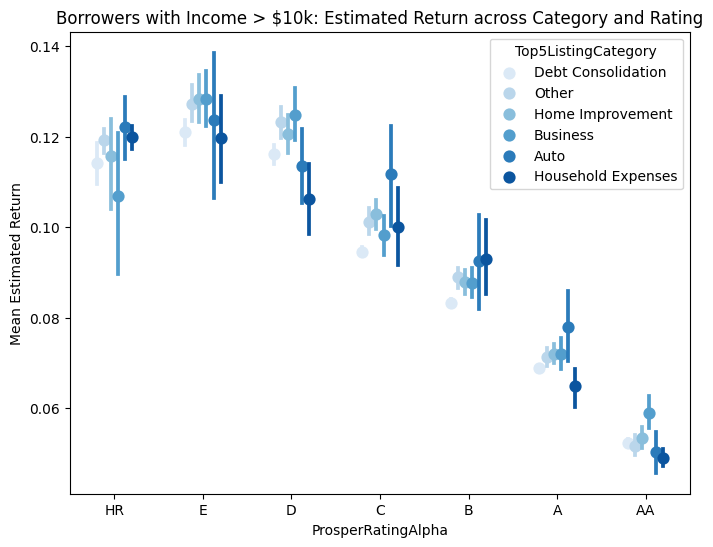

In [81]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_borrower_o10k, 
                  x = 'ProsperRatingAlpha',
                  y = 'EstimatedReturn',
                  hue = 'Top5ListingCategory',
                  palette = 'Blues', 
                  linestyles = '', 
                  dodge = 0.4,
                  errorbar= 'ci')
plt.title('Borrowers with Income > $10k: Estimated Return across Category and Rating')
plt.ylabel('Mean Estimated Return')
ax.set_yticklabels([],minor = True);

> This second plot reinforces the strong influence of the Rating on the estimated return.<br>
> The larger error bars, speacially in the HR group, is a sign that we have fewer customer in that condition.<br>

> In general, comparing both groups, the difference in return of the category is not significant.


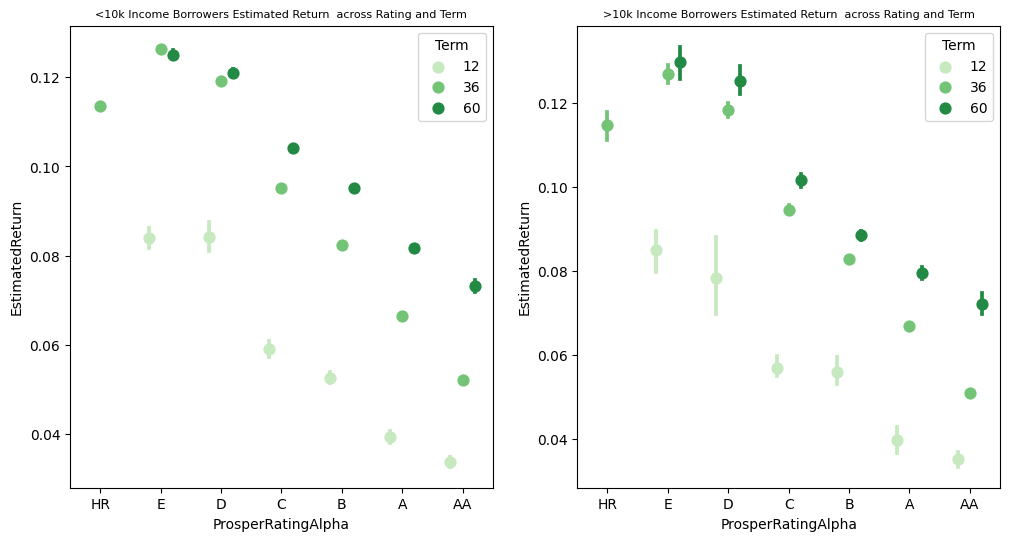

In [82]:
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
i = 0
sb.pointplot(data = df_borrower_b10k, x = 'ProsperRatingAlpha', y = 'EstimatedReturn', hue = "Term",
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[i])
ax[i].set_title("<10k Income Borrowers Estimated Return  across Rating and Term", fontsize = 8)
i+=1
sb.pointplot(data = df_borrower_o10k, x = 'ProsperRatingAlpha', y = 'EstimatedReturn', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[i])
ax[i].set_title(">10k Income Borrowers Estimated Return  across Rating and Term", fontsize = 8);

> Checking the relationship across the Term, it is possible to see that the group with incomes above 10k have a lower Estimated Return gap with the change of the Term, in comparison to the group with a lower income for the Prosper Rating groups above D.<br>
> The groups from HR to D  are showing the highest Mean Estimated Returns, which reinforces the thesis that this group can be profitable for the bank, but preferable from mid to long terms

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The investigation showed that the Loan Category doesn't change much the estimated return within the same rating group, but we see that there are some categories that have better returns in one risk group in comparison to another. For example, Household expenses in the HR group have a highest return, while in the rating group E, it is the Auto that has the best one.<br>
> Splitting the group in customers with up to 10k of monthly income has showed that the Prosper Rating affect both groups almost equally towards the Estimated Income. Corroborating to the negative correlation, found in the bivariate exploration, its clear to see that the Estimated Return reduces with the increase of the Prosper Rating.<br>
> When comparing the Estimated Return across the Term and Prosper Rating, the negative slope is still present, and the Return gap among Terms is lower in the "richer" group than the "poorer" ones as from the D Rating 

### Were there any interesting or surprising interactions between features?

> The curious thing happens in the range of high risk (HR). In all the plots, the return is alwas showing in a high position, despite big dispersion. The estimated return is very close (sometimes bigger) than the higher ratings.<br>
> So, despite having higher risk, loans for this niche of customer can be very profitable, specially with customers of incomes lower than 10k.<br>
> This is reinforced when we relate the return and prosper rating towards the term. A medium term loan to a HR customer has higher return than a short term loan to a AA customer.

## Conclusions
> Despite many features involving a loan, the Prosper Rating seems to be the one that most impact the estimated return.<br>
> The estimated return of the borrower state is quite similar to each state.<br>
> The majority of the unemployed borrowers are in the category HR and E,  in the Prosper Rating feauture. However, loans to HR rating yields almost two times more estimated return then to a AA borrower for the same term. If the bank is expecting to have higher returns, this can be a good niche to explore.

In [83]:
#Sending final dataset to be loaded in the slideshow
df_loans_filtered.to_csv("prosper_loans_filtered.csv",index  = False)